# Ames Housing Price Prediction Model

In the late 19th century, American steel mogul Andrew Carnegie famously made a bold prediction that investment in real estate would be the wise way to multiply one's wealth. This statement has turned out to be relevent and agreeable to most of us 100 years later in the 21th century.

>“Ninety percent of all millionaires become so through owning real estate. More money has been made in real estate than in all industrial investments combined. The wise young man or wage earner of today invests his money in real estate.” - Andrew Cargie 

According to Forbes rich list in 2018, out of the 22 billionaires in Singapore, 16 of them are real-estate tycoons. The total fortune came up to a staggering $43.7 billion, which grew up to nearly 10 percent from the previous year [(Channel News Asia, 2018)](./Readme.md). We cannot deny that all the successful real-estate investors have had either natural talent or decade-trained experience in them to tell a good or bad property listing or development project apart. Nevertheless, it would be fascinating if we could unravel and quantify the investors' - or ordinary home-buyer - judgement with the help of Data Science. So we set out a journey to create a machine learning model that could benchmark a property pricing based on its attributes.

In this project, we will develop a predictive model on housing sale price using regression technique. The model would be trained using an extensive training historical data and be evaluated with a testing set on its predictive performance. We believe that a model like this would be very valuable for any real state agent or home-buyer to set a benchmark pricing to judge whether a property listing is over or under-valued.

The dataset that we are using are part of housing sales record between 2006 and 2010 in Ames, Iowa from the Assessor’s Office. Originally contained 113 variables describing 3970 property sales, the data were used in calculation of home values for the city’s assessment process. It was then cleaned and refined by Dean de Cock from Truman State University, down to only 80 variables focusing on the quality and quantity of many physical attributes of the property [(Dean de Cock, 2011)](http://jse.amstat.org/v19n3/decock.pdf).

# Problem Statement

Real Estate has always taken up a huge share of investment market around the world. However, most of the housing price are still benchmarked manually by experienced appraiser. Hence, it would really helpful to property investor if a predictive model can be created to find out any undervalued property listing and maximize their profit.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Libraries-Import" data-toc-modified-id="Libraries-Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries Import</a></span></li><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Overview</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#General-Cleaning" data-toc-modified-id="General-Cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General Cleaning</a></span><ul class="toc-item"><li><span><a href="#Column-Name" data-toc-modified-id="Column-Name-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Column Name</a></span></li><li><span><a href="#General-Missing-Value-Handling" data-toc-modified-id="General-Missing-Value-Handling-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>General Missing Value Handling</a></span></li></ul></li><li><span><a href="#Trainset-Cleaning" data-toc-modified-id="Trainset-Cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Trainset Cleaning</a></span><ul class="toc-item"><li><span><a href="#Lot-Frontage" data-toc-modified-id="Lot-Frontage-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Lot Frontage</a></span></li><li><span><a href="#Masonry-Veneer" data-toc-modified-id="Masonry-Veneer-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Masonry Veneer</a></span></li><li><span><a href="#Basement" data-toc-modified-id="Basement-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Basement</a></span></li><li><span><a href="#Garage" data-toc-modified-id="Garage-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Garage</a></span></li></ul></li><li><span><a href="#Test-Set-Cleaning" data-toc-modified-id="Test-Set-Cleaning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Test Set Cleaning</a></span><ul class="toc-item"><li><span><a href="#Masonry-Veneer" data-toc-modified-id="Masonry-Veneer-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Masonry Veneer</a></span></li><li><span><a href="#Garage-Type" data-toc-modified-id="Garage-Type-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Garage Type</a></span></li><li><span><a href="#Electrical" data-toc-modified-id="Electrical-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Electrical</a></span></li></ul></li><li><span><a href="#Datetime-Error-Checking" data-toc-modified-id="Datetime-Error-Checking-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Datetime Error Checking</a></span><ul class="toc-item"><li><span><a href="#Trainset" data-toc-modified-id="Trainset-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Trainset</a></span></li><li><span><a href="#Testset" data-toc-modified-id="Testset-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Testset</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Categorical-Columns" data-toc-modified-id="Categorical-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical Columns</a></span><ul class="toc-item"><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Boxplot-Analysis" data-toc-modified-id="Boxplot-Analysis-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Boxplot Analysis</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Cramer's-V-Analysis" data-toc-modified-id="Cramer's-V-Analysis-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Cramer's V Analysis</a></span></li></ul></li><li><span><a href="#Numerical-Columns" data-toc-modified-id="Numerical-Columns-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numerical Columns</a></span><ul class="toc-item"><li><span><a href="#Preliminary-Feature-Engineering" data-toc-modified-id="Preliminary-Feature-Engineering-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Preliminary Feature Engineering</a></span></li><li><span><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Scatter Plots</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li></ul></li><li><span><a href="#Continuous-Variable" data-toc-modified-id="Continuous-Variable-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Continuous Variable</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Missing-Data-Imputation-using-Regression" data-toc-modified-id="Missing-Data-Imputation-using-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing Data Imputation using Regression</a></span><ul class="toc-item"><li><span><a href="#Target---Garage-Age" data-toc-modified-id="Target---Garage-Age-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Target - Garage Age</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Data-Merging" data-toc-modified-id="Data-Merging-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Data Merging</a></span></li></ul></li><li><span><a href="#Training-Data-Preprocessing" data-toc-modified-id="Training-Data-Preprocessing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li></ul></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression-(Benchmark)" data-toc-modified-id="Multiple-Linear-Regression-(Benchmark)-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Multiple Linear Regression (Benchmark)</a></span></li><li><span><a href="#RFECV" data-toc-modified-id="RFECV-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>RFECV</a></span></li></ul></li><li><span><a href="#Regression-Model-Selection" data-toc-modified-id="Regression-Model-Selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Regression Model Selection</a></span><ul class="toc-item"><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>ElasticNet</a></span></li></ul></li></ul></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prediction</a></span><ul class="toc-item"><li><span><a href="#Prediction-with-Best-Model" data-toc-modified-id="Prediction-with-Best-Model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Prediction with Best Model</a></span></li><li><span><a href="#Prediction-Distribution" data-toc-modified-id="Prediction-Distribution-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Prediction Distribution</a></span></li><li><span><a href="#Submission-Data-Export" data-toc-modified-id="Submission-Data-Export-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Submission Data Export</a></span></li></ul></li><li><span><a href="#Inferential-Statistics" data-toc-modified-id="Inferential-Statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Inferential Statistics</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Initialization

### Libraries Import

In [1]:
# Vanilla Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Pandas Setting
pd.set_option('display.max_columns', 999)

In [2]:
# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Data Reading
train = pd.read_csv('./datasets/train.csv', keep_default_na=False)
test = pd.read_csv('./datasets/test.csv', keep_default_na=False)

### Data Overview

In [4]:
# Data Shape
print('Training Set Shape: ', train.shape)
print('Testing Set Shape: ', test.shape)

Training Set Shape:  (2051, 81)
Testing Set Shape:  (879, 80)


In [5]:
# Sanity Check
proportion = test.shape[0] / (test.shape[0] + train.shape[0])
print('Test-to-train Ratio: ', proportion)

Test-to-train Ratio:  0.3


30% of the original data is set as holdout for testing, which gave us 70% of data to work with for modelling. We should now take a look at the data to find out any errors to rectify and address.

In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [7]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


We may notice that there are some missing values in the dataframe. However, instead of marked as Nan, the value is empty. Let's find out the problem in the next section.

## Data Cleaning

### General Cleaning

#### Column Name

All the columns contain spaces between wording, and are all title-cased. It would be easier if we rename all the columns to - our pythonistic favorite - snakecase.

In [8]:
# Replace with standard PEP8 guidelines
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

#### General Missing Value Handling

Now that our column name are standardized, we may now check on the missing data count in dataframe.

In [9]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

The check on missing data returns nothing, we should do a sanity check on the first 5 rows of the dataframe before confirming that the dataframe is truly complete.

In [10]:
train.head().lot_frontage

0      
1    43
2    68
3    73
4    82
Name: lot_frontage, dtype: object

As it turns out, all the missing value in the dataframe was turned into an empty string. Thus unable to be captured as a missing value. Now we need to replace all the empty string back into np.nan and cast the columns back into numerical columns.

In [11]:
# Replace all empty string with np.nan
train.replace('', np.nan, inplace=True)
test.replace('', np.nan, inplace=True)

# Cast numerical column back into float
train = train.apply(pd.to_numeric, errors='ignore')
test = test.apply(pd.to_numeric, errors='ignore')

In [12]:
train.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 81, dtype: object

In [13]:
train.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

After rectifying the data type problem, we can find that:
* Majority of our data are in 'string' format, 42 out of 81 columns.
* 39 of the rest are numerical columns that are easier to work with.
However, let's look into each of the categories to make sure there is no data-type error remains.

In [14]:
# Empty columns
train.isnull().sum()[train.isnull().sum()>0]

lot_frontage      330
mas_vnr_type       22
mas_vnr_area       22
bsmt_qual           1
bsmt_cond           1
bsmt_exposure       4
bsmtfin_type_1      1
bsmtfin_sf_1        1
bsmtfin_type_2      2
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_yr_blt     114
garage_finish       1
garage_cars         1
garage_area         1
garage_qual         1
garage_cond         1
dtype: int64

In [15]:
test.isnull().sum()[test.isnull().sum()>0]

lot_frontage     160
mas_vnr_type       1
mas_vnr_area       1
electrical         1
garage_yr_blt     45
garage_finish      1
dtype: int64

It appeared that **test** also have missing data, albeit much lesser than **train**, we will look into the data cleaning to make the dataset complete.

### Trainset Cleaning

#### Lot Frontage

In [16]:
print('Missing lot_frontage in Trainset:', round(train.lot_frontage.isnull().sum()/len(train)*100, 1), '%')
print('Missing lot_frontage in Testset:', round(test.lot_frontage.isnull().sum()/len(test)*100, 1), '%')

Missing lot_frontage in Trainset: 16.1 %
Missing lot_frontage in Testset: 18.2 %


We can see that there are 16% and 18% of missing **lot_frontage** data in trainset and testset respectively. The percentage is very significant, it would not be sensible to replace the missing value by the mean or median value as it would disrupt the distribution of **lot_frontage**. It would be better to drop the column off entirely as it would not prove to be vital to the modelling due to the high missing data count.

In [17]:
# Drop off lot_frontage
train.drop('lot_frontage', axis=1, inplace=True)
test.drop('lot_frontage', axis=1, inplace=True)

#### Masonry Veneer

In [18]:
train[['mas_vnr_type','mas_vnr_area']].isnull().sum()

mas_vnr_type    22
mas_vnr_area    22
dtype: int64

In [19]:
train.loc[train['mas_vnr_type'].isnull(),['mas_vnr_type', 'mas_vnr_area']].T

,22,41,86,212,276,338,431,451,591,844,913,939,1025,1244,1306,1430,1434,1606,1699,1815,1820,1941
mas_vnr_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mas_vnr_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appeared that if there is missing value in **mas_vnr_type**, the **mas_vnr_area** would be missing too. However, since there are 22 rows in the **train** set that has missing value for these columns. We may replace it with the mode of the column.

In [20]:
mode = train['mas_vnr_type'].value_counts().idxmax()
train['mas_vnr_type'].fillna(mode, inplace=True)

In [21]:
train.groupby('mas_vnr_type').get_group('None')['mas_vnr_area'].value_counts()

0.0      1213
1.0         3
344.0       1
288.0       1
Name: mas_vnr_area, dtype: int64

Technically, if there is none Masonry Veneer, **mas_vnr_type** in the house, the area **mas_vnr_area** should be zero as well. However, we have seen some of the data has value other than zero. We should fill up all the missing value with zero and replace the outliers with zero as well.

In [22]:
# Replace wrong value
train.loc[train['mas_vnr_type']=='None', 'mas_vnr_area'] = 0

In [23]:
# Sanity check
train.groupby('mas_vnr_type').get_group('None')['mas_vnr_area'].value_counts()

0.0    1240
Name: mas_vnr_area, dtype: int64

In [24]:
train[['mas_vnr_type','mas_vnr_area']].isnull().sum()

mas_vnr_type    0
mas_vnr_area    0
dtype: int64

Now that the masonry veneer columns has been fixed, we may move to the next section, data field about Basement.

#### Basement

In [25]:
bsmt_cols = [col for col in train.columns if 'bsmt' in col]

In [26]:
bsmt = train[bsmt_cols]
bsmt[bsmt.isnull().any(axis=1)]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


There are only 6 rows of the data that has missing value, let's try to perform data imputation from the related data in the other columns. We may start with the bottom 3 rows first, all 3 of the rows have **bsmt_qual** of **Gd** grade and **bsmt_cond** of **TA** grade. Let's find out what is the most common **bsmt_exposure** given the condition on the other 2 columns.

In [27]:
bsmt.groupby('bsmt_qual').get_group('Gd').groupby('bsmt_cond').get_group('TA')['bsmt_exposure'].value_counts()

No    473
Av    173
Gd     95
Mn     69
Name: bsmt_exposure, dtype: int64

From the result above, we may see that the most type of exposure, **bsmt_exposure** based on the condition is 'No'. We will replace the missing data with 'No'.

In [28]:
train.loc[(train['bsmt_exposure'].isnull()) & (train['bsmt_cond']=='TA'), 'bsmt_exposure'] = 'No'

In [29]:
bsmt = train[bsmt_cols]
bsmt[bsmt.isnull().any(axis=1)]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
bsmt.groupby('bsmt_qual').get_group('NA')['bsmtfin_type_2'].value_counts()

NA    54
Name: bsmtfin_type_2, dtype: int64

From the result above, we may see that if there is no Basement in the house, the **bsmtfin_type_2** would be 'NA' as well. So we will replace the missing value with 'NA'.

In [31]:
train.loc[train['bsmtfin_type_2'].isnull(), 'bsmtfin_type_2'] = 'NA'

In [32]:
bsmt = train[bsmt_cols]
bsmt[bsmt.isnull().any(axis=1)]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1327,NaN,NaN,NaN,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN


In [33]:
bsmt.groupby('bsmt_qual').get_group('NA')['bsmt_full_bath'].value_counts()

0.0    53
Name: bsmt_full_bath, dtype: int64

In [34]:
bsmt.groupby('bsmt_qual').get_group('NA')['bsmt_half_bath'].value_counts()

0.0    53
Name: bsmt_half_bath, dtype: int64

Similar to **bsmtfin_type_2**, when there is no basement in the house, the value of **bsmt_full_bath** and **bsmt_half_bath** ought to be zero. Let's now replace them with zero.

In [35]:
train.loc[train['bsmt_full_bath'].isnull(), 'bsmt_full_bath'] = 0
train.loc[train['bsmt_half_bath'].isnull(), 'bsmt_half_bath'] = 0

In [36]:
bsmt = train[bsmt_cols]
bsmt[bsmt.isnull().any(axis=1)]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,NaN,NaN,NaN,NaN,NaN,NA,NaN,NaN,NaN,0.0,0.0


The final row that contains missing value has missing value for all the basement attributes, it would not be possible to know exactly what are the values without references to the other basement columns. So we are left with no choice but to drop this row entirely form the dataset.

In [37]:
drop_index = bsmt[bsmt.isnull().any(axis=1)].index
train.drop(drop_index, inplace=True)

In [38]:
train.isnull().sum()[train.isnull().sum()>0]

garage_yr_blt    114
garage_finish      1
garage_cars        1
garage_area        1
garage_qual        1
garage_cond        1
dtype: int64

Now we are only left with the Garage attributes. Let's dive into them in the next section.

#### Garage

We won't be looking into the **garage_yr_blt** right now for the missing value as we will be using other means to find out the values.

In [39]:
temp_view = train.drop(['garage_yr_blt'], axis=1)
temp_view[temp_view.isnull().any(axis=1)]

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


It turns out that there is only 1 row that has missing data on the garage attributes. The row has missing data in all of the garage-associated columns, so same as before, it would not be possible to guess the value. It should be dropped from the dataset.

In [40]:
drop_index = temp_view[temp_view.isnull().any(axis=1)].index
train.drop(drop_index, inplace=True)

In [41]:
train.isnull().sum()[train.isnull().sum()>0]

garage_yr_blt    113
dtype: int64

As stated above, we will leave **garage_yr_blt** for now as we would do some feature engineering on the column.

### Test Set Cleaning

Next up, we will perform the same cleaning procedures to testing set so that both the dataset are standardized.

In [42]:
test.isnull().sum()[test.isnull().sum()>0]

mas_vnr_type      1
mas_vnr_area      1
electrical        1
garage_yr_blt    45
garage_finish     1
dtype: int64

#### Masonry Veneer

In [43]:
test.loc[test.mas_vnr_type.isnull(), ['mas_vnr_type', 'mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
866,NaN,NaN


In [44]:
test['mas_vnr_type'].fillna('None', inplace=True)
test['mas_vnr_area'].fillna(0, inplace=True)

#### Garage Type

In [45]:
test[test.garage_finish.isnull()]

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
765,1357,903426160,60,RM,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NA,Detchd,NaN,NaN,1,360,NA,NA,Y,64,0,180,0,0,0,NA,MnPrv,Shed,1000,9,2008,WD


In [46]:
train.groupby('garage_type').get_group('Detchd').garage_finish.value_counts()

Unf    496
RFn     24
Fin     14
Name: garage_finish, dtype: int64

In [47]:
test.garage_finish.fillna('Unf', inplace=True)

#### Electrical

For the electrical part, we would merely replace it with the mode since it has dominated over 90% of the properties in the trainset.

In [48]:
test[test.electrical.isnull()]

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
635,1578,916386080,80,RL,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD


In [49]:
train.electrical.value_counts(normalize=True)

SBrkr    0.911176
FuseA    0.067838
FuseF    0.017082
FuseP    0.003416
Mix      0.000488
Name: electrical, dtype: float64

In [50]:
test.electrical.fillna(train.electrical.mode()[0], inplace=True)

In [51]:
test.isnull().sum()[test.isnull().sum()>0]

garage_yr_blt    45
dtype: int64

Same as the trainset, now we are only left with **garage_yr_blt** column that has missing value. We will do this with feature engineering on the later part.

### Datetime Error Checking

#### Trainset

In [52]:
train[['year_built', 'year_remod/add', 'garage_yr_blt']].describe()

,year_built,year_remod/add,garage_yr_blt
count,2049.000000,2049.000000,1936.000000
mean,1971.745242,1984.199610,1978.724690
std,30.168060,21.030407,25.436797
min,1872.000000,1950.000000,1895.000000
25%,1954.000000,1965.000000,1961.000000
50%,1974.000000,1993.000000,1980.000000
75%,2001.000000,2004.000000,2002.000000
max,2010.000000,2010.000000,2207.000000


We can see that there is definitely error in the **garage_yr_blt** column whereby the max is 2207, which is impossible. Let's do a quick check on the other datetime data to confirm there is no other row that has value later than the **yr_sold**.

In [53]:
train.loc[(train['year_remod/add']>train.yr_sold) | (train.garage_yr_blt>train.yr_sold), ['year_built', 'year_remod/add', 'garage_yr_blt', 'yr_sold']]

,year_built,year_remod/add,garage_yr_blt,yr_sold
1699,2006,2007,2207.0,2007
1719,2007,2008,2007.0,2007
1885,2008,2009,2008.0,2007


As it turns out, there are 3 rows that have error in the data, where the year is later than the **yr_sold**. We need to rectify the data to be sensible.

In [54]:
# Rectify row 1699 and 1719
train.loc[(train['year_remod/add']>train.yr_sold), 'year_remod/add'] = train.yr_sold
train.loc[(train['garage_yr_blt']>train.yr_sold), 'garage_yr_blt'] = train.yr_sold

For the last row, we would drop it entirely as three of the dates are later than the year sold, it would not make sense. Instead of manually changing all the 3 dates, it might be more worthwhile to drop the row.

In [55]:
# Drop out 1885
train.drop(train[train['year_built']>train.yr_sold].index, inplace=True)

In [56]:
# Sanity check
train.loc[(train['year_remod/add']>train.yr_sold) | (train.garage_yr_blt>train.yr_sold), ['year_built', 'year_remod/add', 'garage_yr_blt', 'yr_sold']]

,year_built,year_remod/add,garage_yr_blt,yr_sold


As we see above, the problem in datetime columns have been rectified, let's move on to the testing set.

#### Testset

We will perform the same check to the testing set.

In [57]:
test.loc[(test['year_remod/add']>test.yr_sold) | (test.garage_yr_blt>test.yr_sold) | (test.year_built>test.yr_sold), 
         ['year_built', 'year_remod/add', 'garage_yr_blt', 'yr_sold']]

,year_built,year_remod/add,garage_yr_blt,yr_sold
76,2007,2008,2007.0,2007


In [58]:
# Rectifying year_remod column
test.loc[(test['year_remod/add']>test.yr_sold), 'year_remod/add'] = test.yr_sold

In [59]:
# Sanity check
test.loc[(test['year_remod/add']>test.yr_sold) | (test.garage_yr_blt>test.yr_sold) | (test.year_built>test.yr_sold), 
         ['year_built', 'year_remod/add', 'garage_yr_blt', 'yr_sold']]

,year_built,year_remod/add,garage_yr_blt,yr_sold


Errors in datetime column of both training set and testing set has been fully addressed and rectified.

## Exploratory Data Analysis

For the EDA, we will look into the data in 3 parts:

1. Categorical Variable
2. Numerical Variable
3. Continuous Variable (subset of Numerical Variable)

For each of the section, we will be using different technique for preliminary feature selection and error detection.

### Categorical Columns

#### Data Transformation

With references to the data dictionary, some of the categorical column are actually in ordinal form. So we should convert them to numerical format, so that we streamline the selection process. Correlation of numerical columns are also easier to be assessed than categorical ones.

Below is the list of ordinal columns that are marked as nominal in the dataset, we will be transforming the data based on the number of levels it has:

| Type | Ordinal Features Names | Categorical Order | Numerical Replacement | NA Presence |
|------|------------------------|-------------------|-----------------------|-------------|
| A | exter_qual | Po -> Fa -> TA -> Gd -> Ex | 1 - 5 | N |
| A | exter_cond | Po -> Fa -> TA -> Gd -> Ex | 1 - 5 | N |
| A | heating_qc | Po -> Fa -> TA -> Gd -> Ex | 1 - 5 | N |
| A | kitchen_qual | Po -> Fa -> TA -> Gd -> Ex | 1 - 5 | N |
| B | bsmt_qual | NA -> Po -> Fa -> TA -> Gd -> Ex | 0 - 5 | Y |
| B | bsmt_cond | NA -> Po -> Fa -> TA -> Gd -> Ex | 0 - 5 | Y |
| B | fireplace_qu | NA -> Po -> Fa -> TA -> Gd -> Ex | 0 - 5 | Y |
| B | garage_qual | NA -> Po -> Fa -> TA -> Gd -> Ex | 0 - 5 | Y |
| B | garage_cond | NA -> Po -> Fa -> TA -> Gd -> Ex | 0 - 5 | Y |
| C | bsmt_fin_type1 | NA -> Unf -> LwQ -> Rec -> BLQ -> ALQ -> GLQ | 0 - 6 | Y |
| C | bsmt_fin_type2 | NA -> Unf -> LwQ -> Rec -> BLQ -> ALQ -> GLQ | 0 - 6 | Y |
| D | garage_finish | NA -> Unf -> RFn -> Fin | 0 - 3 | Y |
| E | pool_qc | NA -> Fa -> TA -> Gd -> Ex | 0 - 4 | Y |
| F | bsmt_exposure | NA -> No -> Mn -> Av -> Gd | 0 - 4 | Y |

In [60]:
# Type A for Training Dataset
temp_view = train[['exter_qual','exter_cond','heating_qc','kitchen_qual']]
train[['exter_qual','exter_cond','heating_qc','kitchen_qual']] = temp_view.replace({'Po': 1,
                                                                                    'Fa': 2,
                                                                                    'TA': 3,
                                                                                    'Gd': 4,
                                                                                    'Ex': 5 })
# Sanity Check
train[['exter_qual','exter_cond','heating_qc','kitchen_qual']].head(1)

,exter_qual,exter_cond,heating_qc,kitchen_qual
0,4,3,5,4


In [61]:
# Type A for Testing Dataset
temp_view = test[['exter_qual','exter_cond','heating_qc','kitchen_qual']]
test[['exter_qual','exter_cond','heating_qc','kitchen_qual']] = temp_view.replace({ 'Po': 1,
                                                                                    'Fa': 2,
                                                                                    'TA': 3,
                                                                                    'Gd': 4,
                                                                                    'Ex': 5 })

In [62]:
# Type B for Training Dataset
temp_view = train[['bsmt_qual','bsmt_cond','fireplace_qu','garage_qual','garage_cond']]
train[['bsmt_qual','bsmt_cond','fireplace_qu','garage_qual','garage_cond']] = temp_view.replace({'NA': 0,
                                                                                                 'Po': 1,
                                                                                                 'Fa': 2,
                                                                                                 'TA': 3,
                                                                                                 'Gd': 4,
                                                                                                 'Ex': 5 })
# Sanity Check
train[['bsmt_qual','bsmt_cond','fireplace_qu','garage_qual','garage_cond']].head(1)

,bsmt_qual,bsmt_cond,fireplace_qu,garage_qual,garage_cond
0,3,3,0,3,3


In [63]:
# Type B for Testing Dataset
temp_view = test[['bsmt_qual','bsmt_cond','fireplace_qu','garage_qual','garage_cond']]
test[['bsmt_qual','bsmt_cond','fireplace_qu','garage_qual','garage_cond']] = temp_view.replace({'NA': 0,
                                                                                                'Po': 1,
                                                                                                'Fa': 2,
                                                                                                'TA': 3,
                                                                                                'Gd': 4,
                                                                                                'Ex': 5 })

In [64]:
# Type C for Training Dataset
train[['bsmtfin_type_1', 'bsmtfin_type_2']] = train[['bsmtfin_type_1','bsmtfin_type_2']].replace({'NA': 0,
                                                                                                  'Unf': 1,
                                                                                                  'LwQ': 2,
                                                                                                  'Rec': 3,
                                                                                                  'BLQ': 4,
                                                                                                  'ALQ': 5,
                                                                                                  'GLQ': 6 })
# Sanity Check
train[['bsmtfin_type_1', 'bsmtfin_type_2']].head(1)

,bsmtfin_type_1,bsmtfin_type_2
0,6,1


In [65]:
# Type C for Testing Dataset
test[['bsmtfin_type_1', 'bsmtfin_type_2']] = test[['bsmtfin_type_1','bsmtfin_type_2']].replace({'NA': 0,
                                                                                                'Unf': 1,
                                                                                                'LwQ': 2,
                                                                                                'Rec': 3,
                                                                                                'BLQ': 4,
                                                                                                'ALQ': 5,
                                                                                                'GLQ': 6 })

In [66]:
# Type D for Training Dataset
train['garage_finish'] = train['garage_finish'].replace({'NA': 0,
                                                         'Unf': 1,
                                                         'RFn': 2,
                                                         'Fin': 3 })

# Type E for Training Dataset
train['pool_qc'] = train['pool_qc'].replace({'NA': 0,
                                             'Fa': 1,
                                             'TA': 2,
                                             'Gd': 3,
                                             'Ex': 4 }).astype(int)

# Type F for Training Dataset
train['bsmt_exposure'] = train['bsmt_exposure'].replace({'NA': 0,
                                                         'No': 1,
                                                         'Mn': 2,
                                                         'Av': 3,
                                                         'Gd': 4 })

In [67]:
# Sanity Check on Dtypes
train.dtypes.value_counts()

int64      42
object     28
float64    10
dtype: int64

In [68]:
# Type D for Testing Dataset
test['garage_finish'] = test['garage_finish'].replace({'NA': 0,
                                                       'Unf': 1,
                                                       'RFn': 2,
                                                       'Fin': 3 })

# Type E for Testing Dataset
test['pool_qc'] = test['pool_qc'].replace({'NA': 0,
                                           'Fa': 1,
                                           'TA': 2,
                                           'Gd': 3,
                                           'Ex': 4 })

# Type F for Testing Dataset
test['bsmt_exposure'] = test['bsmt_exposure'].replace({'NA': 0,
                                                       'No': 1,
                                                       'Mn': 2,
                                                       'Av': 3,
                                                       'Gd': 4 })

In [69]:
# Sanity Check on Dtypes
test.dtypes.value_counts()

int64      49
object     28
float64     2
dtype: int64

As we may see from the data type check above, both testing and training set have tallied: 28 categorical columns and 51 numerical columns.

#### Boxplot Analysis

Now that we are left with only 28 categorical field, it would be easier for us to assess a boxplot analysis of these columns.

In [70]:
# Select only categorical field
X_cols = train.select_dtypes(exclude='number').columns
y = train.saleprice

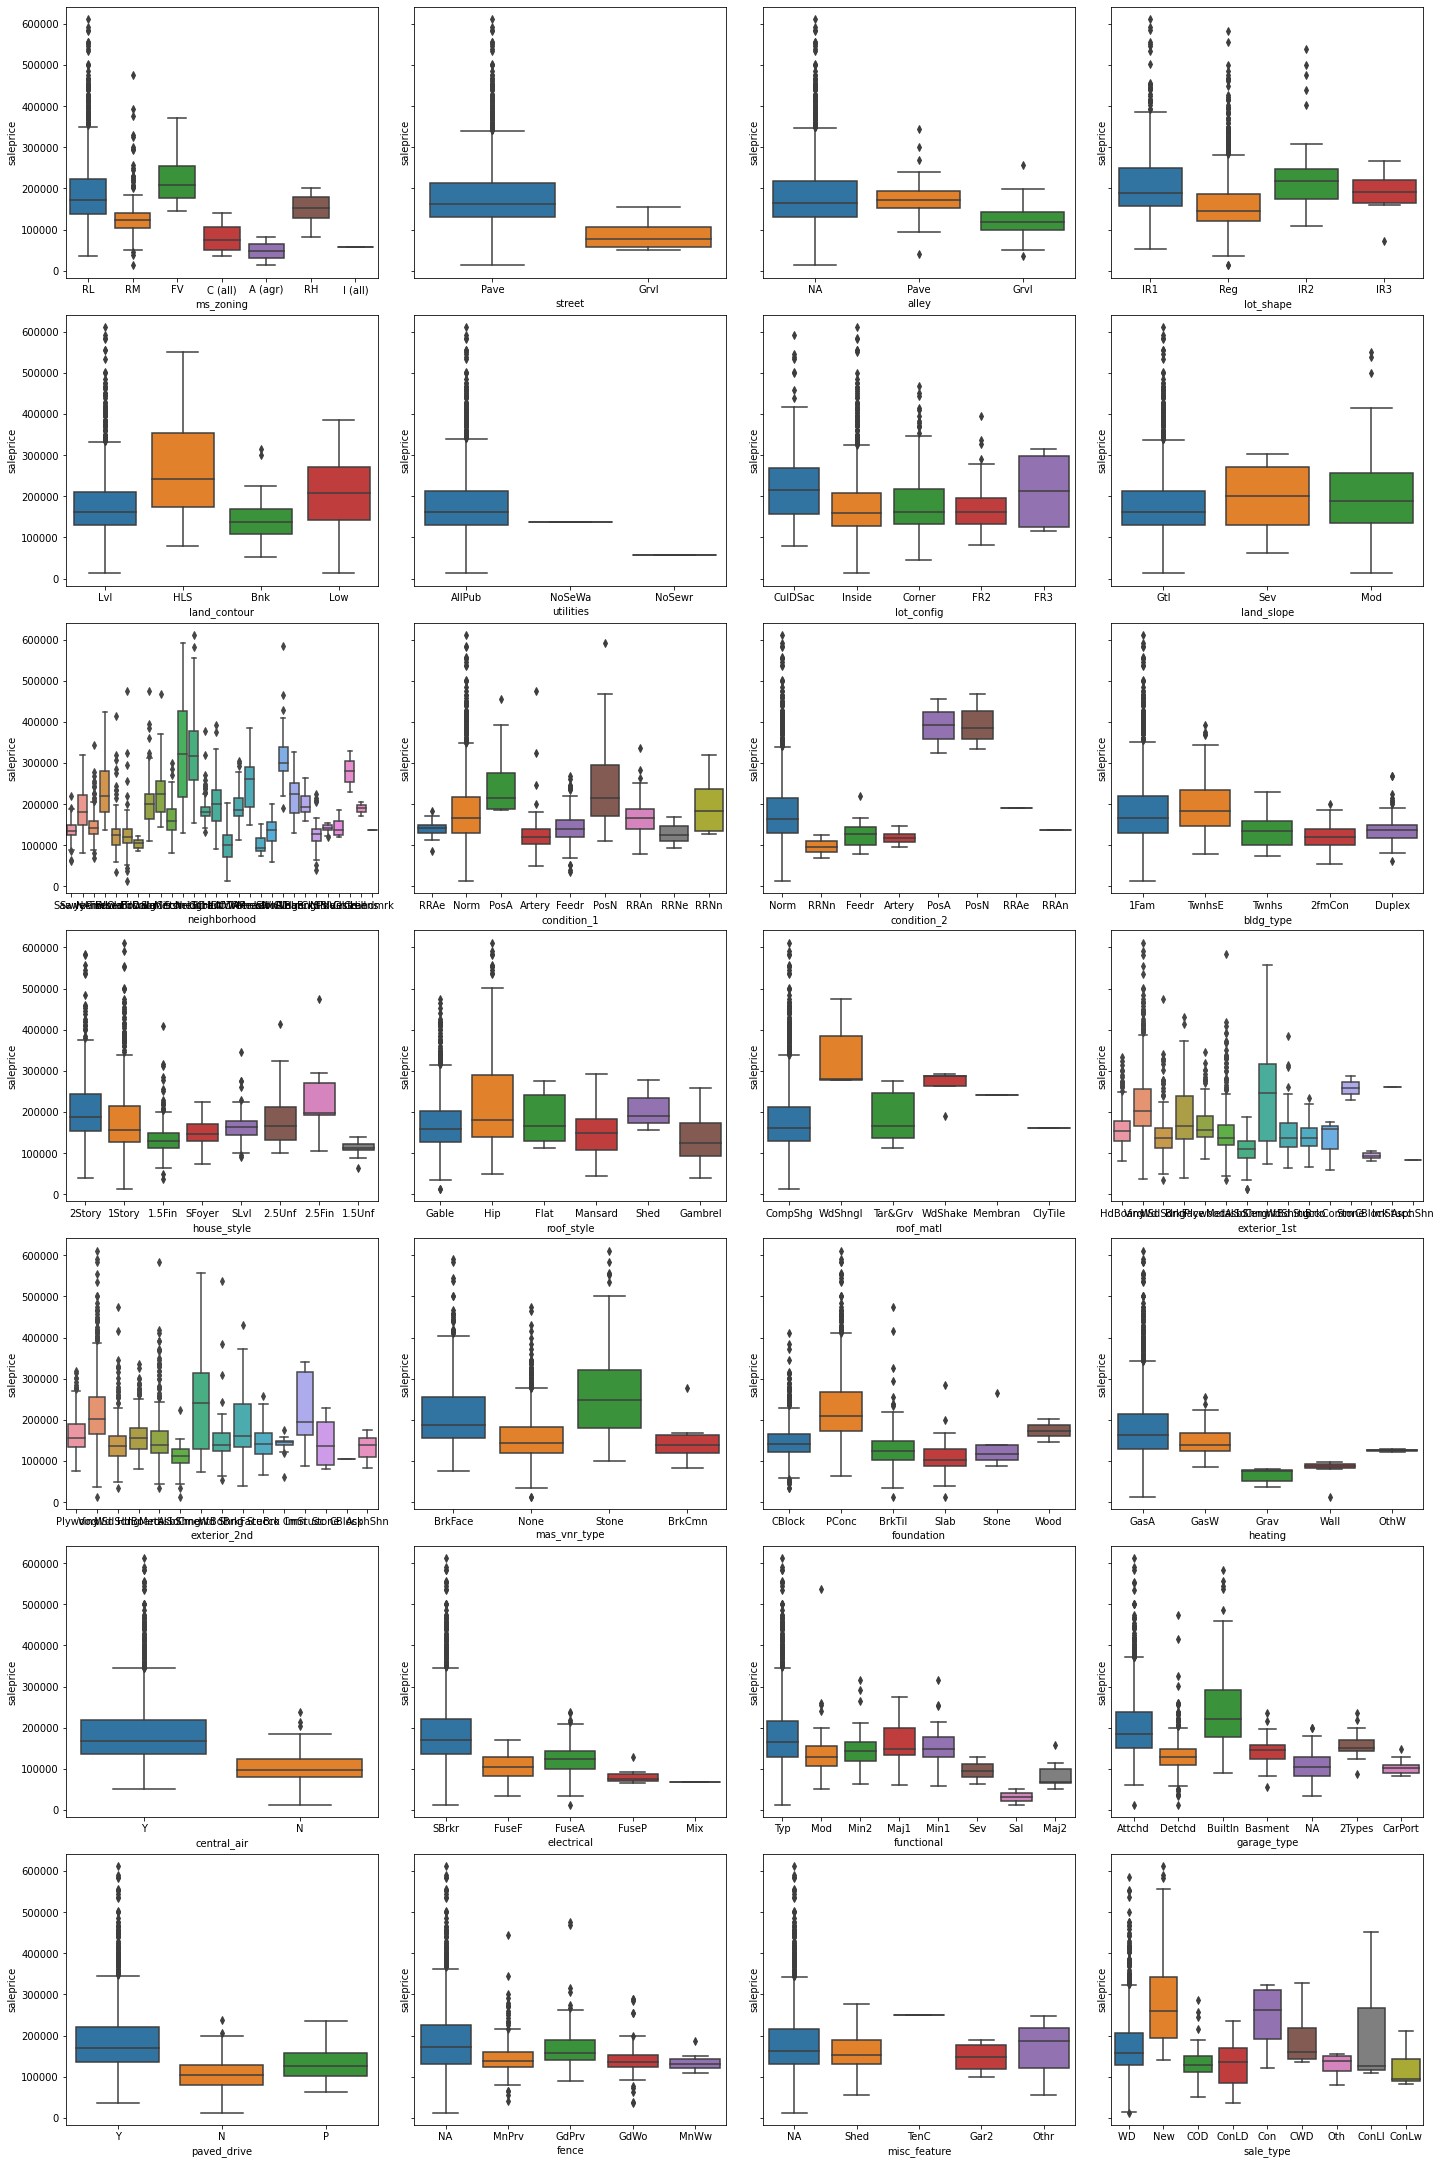

In [71]:
# Plotting Box plot
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(20, 30), sharey=True)
ax = ax.ravel()
for i in range(len(X_cols)):
    sns.boxplot(x=X_cols[i], y='saleprice', data=train, ax=ax[i])
plt.tight_layout(pad=0.5)

From the boxplot above, we may first notice that **utilities** has an extremely dominating class, which render it useless in prediction of our saleprice. However, before dropping the column, let's check on the actual count of each class in **utilities**.

In [72]:
train.utilities.value_counts()

AllPub    2046
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

Now we can be sure there are only 2 rows that does not fit into the dominating class, we should drop the column entirely from our analysis and modelling.

In [73]:
# Drop off Utilities
train.drop('utilities', axis=1, inplace=True)

Next up, we will drop some columns if visually all the classes share the same mean and range. These columns would not be contributing factor to our predictive model as well because there are minimal change in sale price moving from class to class in the column. The columns are (1) **lot_shape**, (2) **lot_config**, (3) **land_slope**, (4) **bldg_type** and (5) **fence**.

In [74]:
# Dropping off columns with similar mean and range between classes
train.drop(['lot_shape','lot_config','land_slope','bldg_type','fence'], axis=1, inplace=True)

#### Correlation Analysis

For the correlation analysis of categorical column, we will be one-hot-encoding each of the column and calculate the Pearson's correlation with **saleprice**. The maximum correlation value will be recorded for preliminary feature selection. 15 columns with the highest maximum correlation value will be selected for further engineering and selection.

In [75]:
corrs = dict()
categorical = train.select_dtypes(exclude='number')
for col in categorical.columns:
    dummies = pd.get_dummies(train[col])
    temp_df = pd.concat([dummies, train[['saleprice']]], axis=1)
    corrs[col] = (np.abs(temp_df.corr()['saleprice'])).drop('saleprice').max()

In [76]:
pd.Series(corrs).sort_values()

misc_feature    0.049081
street          0.069920
heating         0.094173
roof_matl       0.098532
condition_2     0.103474
functional      0.117955
condition_1     0.125241
alley           0.159352
house_style     0.202059
land_contour    0.212179
electrical      0.252838
roof_style      0.265212
central_air     0.277735
ms_zoning       0.280916
paved_drive     0.289617
exterior_2nd    0.337254
exterior_1st    0.341839
sale_type       0.359025
garage_type     0.369665
mas_vnr_type    0.410956
neighborhood    0.448665
foundation      0.530212
dtype: float64

In [77]:
# Assignment of selected categorical index
cat_idx = pd.Series(corrs).sort_values().tail(15).index

#### Cramer's V Analysis

However, the approach of using one-hot encoding to calculate the correlation value does not indicate if any columns is collinear. For the purpose of eliminating collinear variable, we will be calculating the Cramer's V Phi Score of each categorical column. The score ranges from 0 to 1, with 0 being not correlated and 1 being extremely correlated. 

In [78]:
# Cramer's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [79]:
# Create a correlation dataframe
corrs = dict()
categorical = train[cat_idx]
for out_col in categorical.columns:
    col_corr = dict()
    for in_col in categorical.columns:
        col_corr[in_col] = cramers_v(train[in_col], train[out_col])
    corrs[out_col] = col_corr

corrs = pd.DataFrame(corrs)

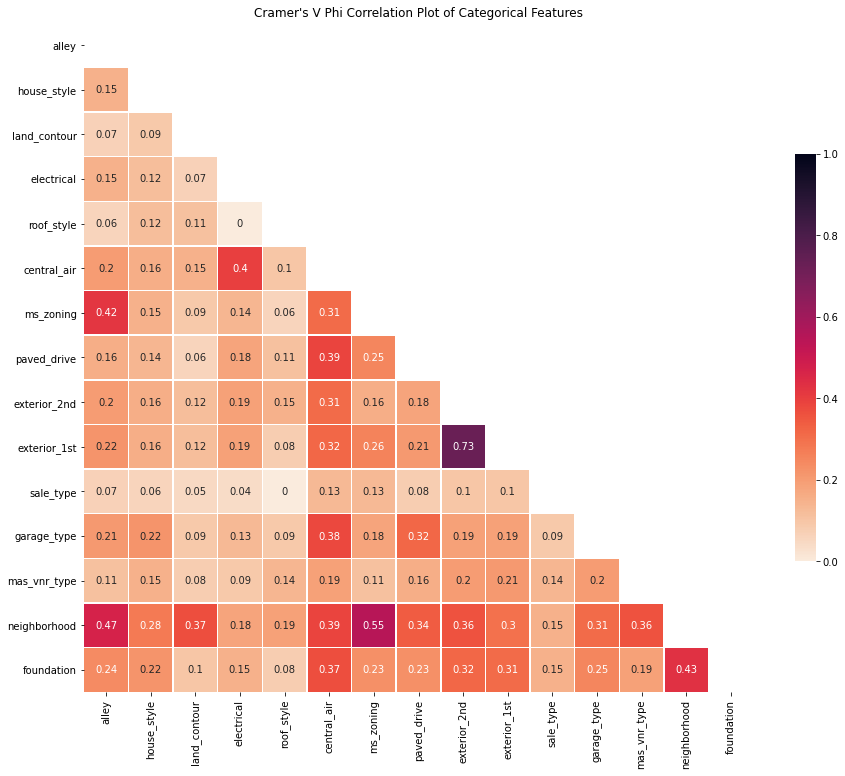

In [80]:
# Plotting correlation heatmap
corr = round(corrs, 2)
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap=sns.cm.rocket_r, 
            linewidths=.5, cbar_kws={'shrink':0.5})
plt.title("Cramer's V Phi Correlation Plot of Categorical Features")
plt.show()

In [81]:
# Check on feature selected
cat_idx

Index(['alley', 'house_style', 'land_contour', 'electrical', 'roof_style',
       'central_air', 'ms_zoning', 'paved_drive', 'exterior_2nd',
       'exterior_1st', 'sale_type', 'garage_type', 'mas_vnr_type',
       'neighborhood', 'foundation'],
      dtype='object')

From the heatmap, we can see that **exterior_1st** is highly correlated to **exterior_2nd**, which are perfectly sensible. For the threshold, we will be setting it as 0.5, so any correlation above 0.5 will be considered to be collinear. Thus, **neighborhood** is collinear to **ms_zoning** as well, this is justifiable too because some neighborhood are zoned different based on the city hall planning.

As such, **exterior_2nd** and **ms_zoning** will be eliminated from the selected features because their counterpart have higher correlation with the sale price.

In [82]:
# Drop off collinear variables
cat_idx = cat_idx.drop(['exterior_2nd','ms_zoning'])

In [83]:
# Sanity Check
train[cat_idx].head()

,alley,house_style,land_contour,electrical,roof_style,central_air,paved_drive,exterior_1st,sale_type,garage_type,mas_vnr_type,neighborhood,foundation
0,NA,2Story,Lvl,SBrkr,Gable,Y,Y,HdBoard,WD,Attchd,BrkFace,Sawyer,CBlock
1,NA,2Story,Lvl,SBrkr,Gable,Y,Y,VinylSd,WD,Attchd,BrkFace,SawyerW,PConc
2,NA,1Story,Lvl,SBrkr,Gable,Y,Y,VinylSd,WD,Detchd,None,NAmes,CBlock
3,NA,2Story,Lvl,SBrkr,Gable,Y,Y,VinylSd,WD,BuiltIn,None,Timber,PConc
4,NA,1.5Fin,Lvl,SBrkr,Gable,Y,N,Wd Sdng,WD,Detchd,None,SawyerW,PConc


### Numerical Columns

From the data dictionary, we can see that both **id** and **pid** represents only as identification marker. Thus it carries no useful information to the modelling and prediction of the saleprice. So we will proceed to drop it from the trainset to narrow down the EDA a little.

In [84]:
# Drop id & pid
train.drop(['id', 'pid'], axis=1, inplace=True)

**ms_subclass** is supposed to be a categorical value instead of a numerical one. The numeric data has no ordinal properties. Let's convert it to category format instead.

In [85]:
# Cast ms_subclass into categorical for both training and testing sets
train.ms_subclass = train.ms_subclass.astype('category')
test.ms_subclass = train.ms_subclass.astype('category')

Let's plot a heatmap showing the correlation of each numerical variables before selecting the features for our modelling.

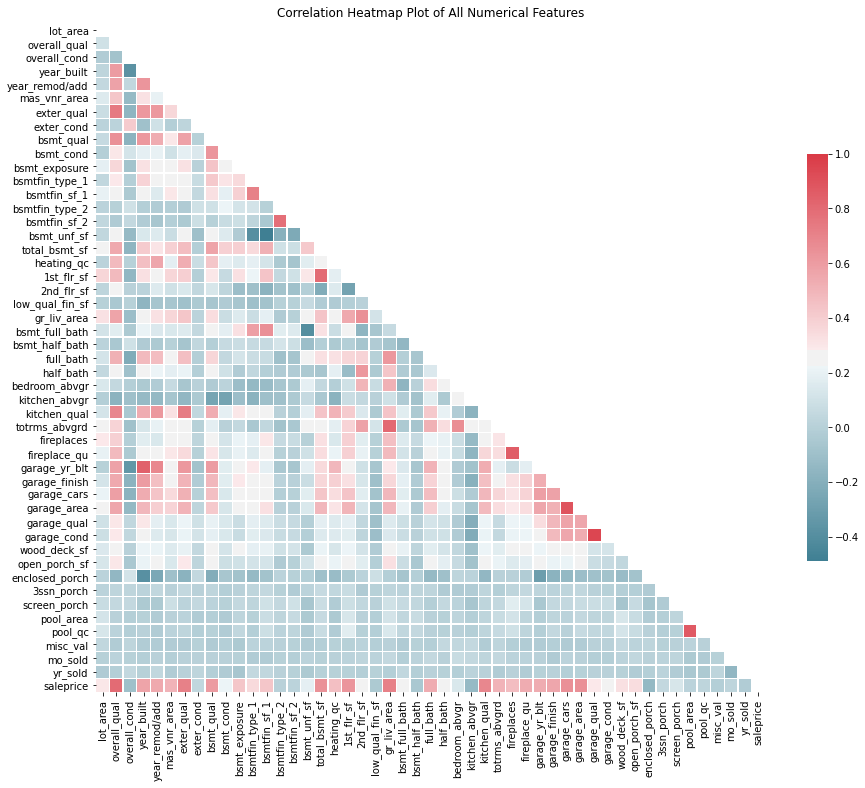

In [86]:
# Correlation Analysis
corr = round(train.corr(),2)
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, square=True, annot=False, mask=mask, cmap=cmap, 
            linewidths=.5, cbar_kws={'shrink':0.5})
plt.title('Correlation Heatmap Plot of All Numerical Features')
plt.show()

For the numerical column, we will set the correlation threshold for our feature selection to only 0.4.

In [87]:
# Feature selection with correlation threshold of 0.4
abs_corr = np.abs(corr['saleprice']).sort_values()
index = abs_corr[abs_corr>0.4].index
index

Index(['bsmtfin_sf_1', 'bsmt_exposure', 'heating_qc', 'fireplaces',
       'mas_vnr_area', 'totrms_abvgrd', 'full_bath', 'garage_yr_blt',
       'fireplace_qu', 'year_remod/add', 'garage_finish', 'year_built',
       'bsmt_qual', '1st_flr_sf', 'total_bsmt_sf', 'garage_cars',
       'garage_area', 'kitchen_qual', 'gr_liv_area', 'exter_qual',
       'overall_qual', 'saleprice'],
      dtype='object')

#### Preliminary Feature Engineering

In [88]:
train.yr_sold.unique()

array([2010, 2009, 2006, 2007, 2008])

Since the dataset features houses that were sold from the year of 2006 up to 2010, we cannot simply compare the year where the house is built, remod etc. It is necessary to transform the year to age by subtracting the respective year columns from **yr_sold**.

In [89]:
# Datetime transformation
train['house_age'] = train['yr_sold'] - train['year_built']
train['remod_age'] = train['yr_sold'] - train['year_remod/add']
train['garage_age'] = train['yr_sold'] - train['garage_yr_blt']

In [90]:
# Sanity check for any negative value
train[['house_age', 'remod_age', 'garage_age']].describe()

,house_age,remod_age,garage_age
count,2048.000000,2048.000000,1935.000000
mean,36.048828,23.589355,29.172093
std,30.198069,21.011729,24.945294
min,0.000000,0.000000,0.000000
25%,7.000000,4.000000,6.000000
50%,34.000000,15.000000,28.000000
75%,54.000000,43.000000,47.000000
max,136.000000,60.000000,114.000000


In [91]:
# Datetime transformation for test data
test['house_age'] = test['yr_sold'] - test['year_built']
test['remod_age'] = test['yr_sold'] - test['year_remod/add']
test['garage_age'] = test['yr_sold'] - test['garage_yr_blt']

In [92]:
# Sanity check for any negative value
test[['house_age', 'remod_age', 'garage_age']].describe()

,house_age,remod_age,garage_age
count,879.000000,879.000000,834.00000
mean,37.291240,23.381115,31.01199
std,30.477921,20.485100,25.73435
min,0.000000,0.000000,0.00000
25%,8.000000,5.000000,7.00000
50%,36.000000,15.000000,30.00000
75%,54.500000,41.000000,48.00000
max,129.000000,60.000000,110.00000


Now that we have converted the years to ages and no error is found from the data. We can proceed to drop the original year columns to avoid overfitting or collinearity.

In [93]:
# Dropping the original year-columns from training data
train.drop(['year_built', 'year_remod/add', 'garage_yr_blt'], axis=1, inplace=True)

#### Scatter Plots

Let's have a quick look on the scatter plot of all numerical columns to see the relationship of each column to **saleprice**. From the plot below, we can see that most of the columns have exhibited a positive slope with regards to the **saleprice**; with the only exception of **house_age**, **remod_age** and **garage_age**. The relationship is perfectly understandable, as a house ages, the saleprice is expected to drop.

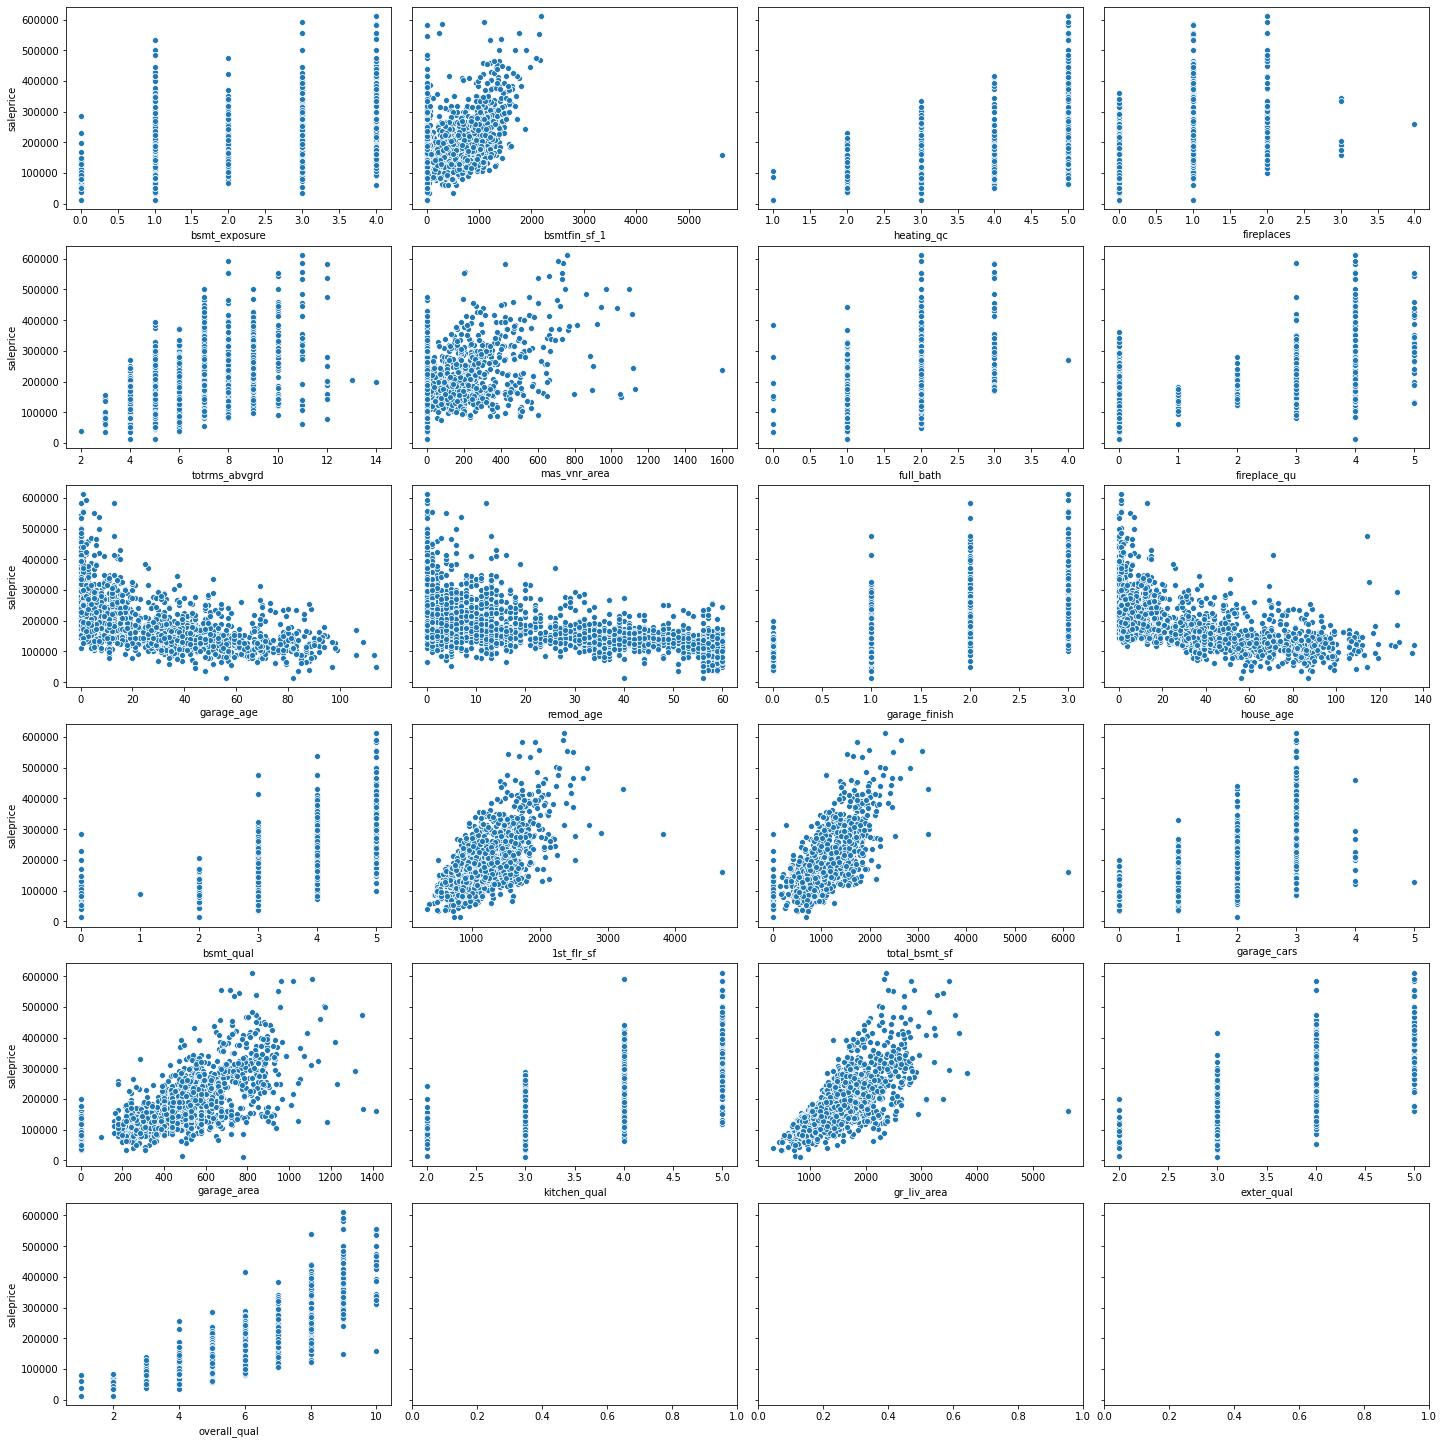

In [94]:
corr = train.corr()
abs_corr = np.abs(corr['saleprice']).sort_values()
index = abs_corr[abs_corr>0.4].index

# Scatter plot
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20, 20), sharey=True)
ax = ax.ravel()
for i in range(len(index)-1):
    sns.scatterplot(x=index[i], y='saleprice', data=train, ax=ax[i])
plt.tight_layout(pad=0.5)

#### Correlation Analysis

Before we are done with the preliminary feature selection, we need to make sure there is minimal collinearity among our features. It can be easily done by plotting a Pearson's correlation heatmap and find out any highly-correlated features.

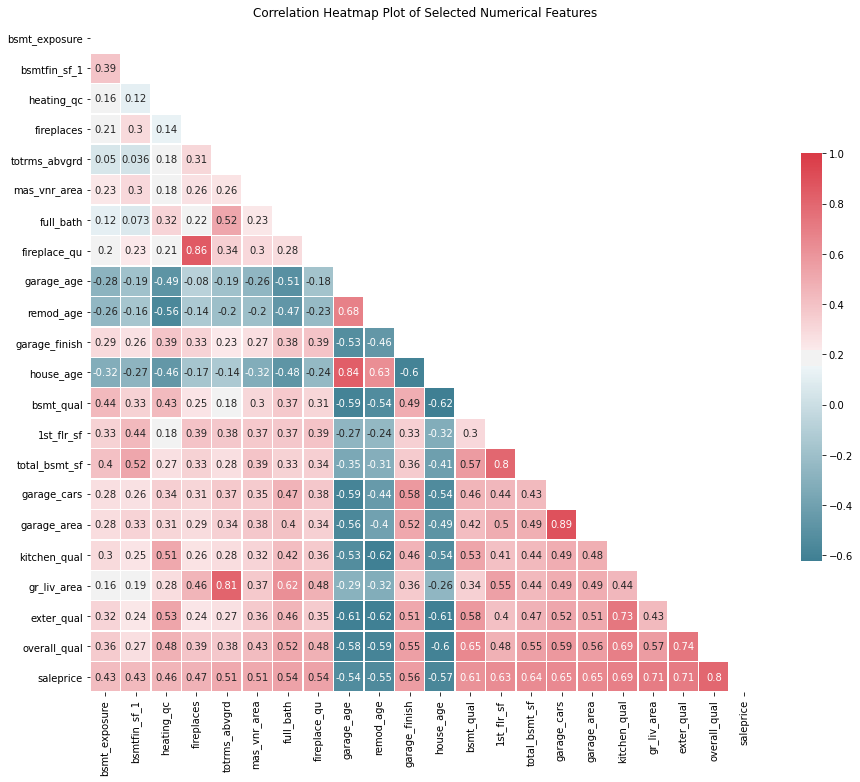

In [95]:
corr = train[index].corr()
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap=cmap, 
            linewidths=.5, cbar_kws={'shrink':0.5})
plt.title('Correlation Heatmap Plot of Selected Numerical Features')
plt.show()

From the heatmap above, we can find out the collinear variables tabulated below. The cut-off threshold for collinearity is set to be 0.8. So we will only keep the variable that has stronger correlation to **saleprice**.

| Variable 1 | Variable 2 | Pearson's Corr | Variable To Keep |
|------------|------------|----------------|------------------|
| fireplace_qu | fireplaces | 0.86 | 1 |
| house_age | garage_age | 0.84 | 1 |
| total_bsmt_sf | 1st_fir_sf | 0.8 | 1 |
| garage_area | garage_cars | 0.89 | 1 |
| gr_liv_area | totrms_abvgrd | 0.81 | 1 |

In [96]:
# Drop off all collinear variables
index = index.drop(['fireplaces','garage_age','1st_flr_sf','garage_cars','totrms_abvgrd'])

In [97]:
# Assignment of selected numerical index
num_idx = index

We have done the preliminary round of feature selection on the numerical column. However, before we move into further feature engineering, we should have a quick round of checking on only the continuous variables in the dataset.

### Continuous Variable

In [98]:
# Filter out only continuous variable (numerical column that has more than 50 unique count)
nume_count = train[num_idx].select_dtypes(include='number').apply(pd.Series.value_counts).notna().sum()
continuous = train[nume_count[nume_count>50].index]
continuous.head(2)

,bsmtfin_sf_1,mas_vnr_area,remod_age,house_age,total_bsmt_sf,garage_area,gr_liv_area,saleprice
0,533.0,289.0,5,34,725.0,475.0,1479,130500
1,637.0,132.0,12,13,913.0,559.0,2122,220000


Let's have another round of inspection on the scatter plot of each of these variables to find out if there is any oddity or error.

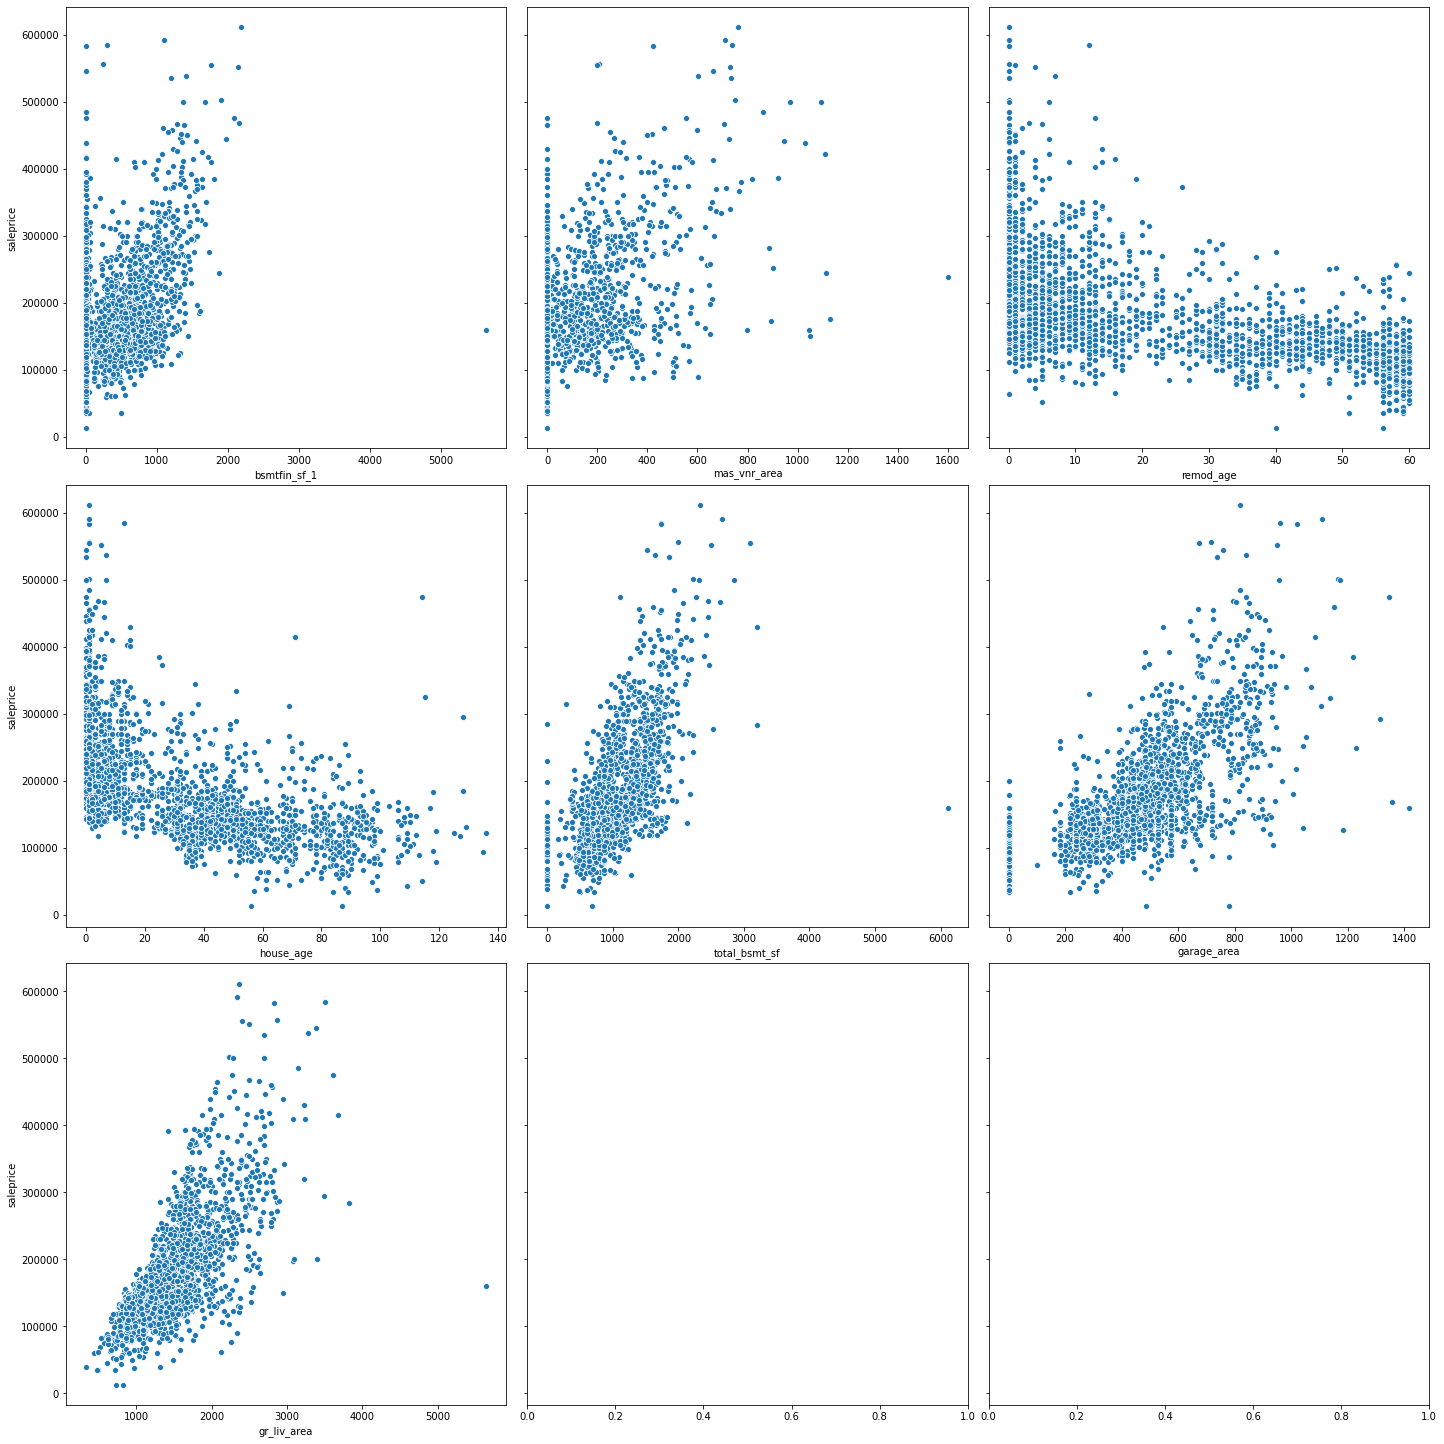

In [99]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharey=True)
ax = ax.ravel()
for i in range(len(continuous.columns)-1):
    sns.scatterplot(x=continuous.columns[i], y='saleprice', data=continuous, ax=ax[i])
plt.tight_layout(pad=0.5)

The general trend seems good enough for our **saleprice** prediction model. However, we may also notice there is an extreme outlier in some of the variables, with extremely large **gr_liv_area**, **total_bsmt_sf**, **bsmt_sf_1**. Let's zoom in to the outlying point.

In [100]:
continuous[train.gr_liv_area>5000]

,bsmtfin_sf_1,mas_vnr_area,remod_age,house_age,total_bsmt_sf,garage_area,gr_liv_area,saleprice
960,5644.0,796.0,0,0,6110.0,1418.0,5642,160000


Similar outlier also exist in **mas_vnr_area**, however it seems that it is totally out of the general trend, and would likely skewed our prediction. We should drop these 2 rows to have a more generalized model in the later stage.

In [101]:
continuous[train.mas_vnr_area>1400]

,bsmtfin_sf_1,mas_vnr_area,remod_age,house_age,total_bsmt_sf,garage_area,gr_liv_area,saleprice
1409,649.0,1600.0,9,10,975.0,576.0,1950,239000


In [102]:
# Dropping Outliers
drop_outlier_index = continuous[(train.gr_liv_area>5000) | (train.mas_vnr_area>1400)].index

In [103]:
train.drop(drop_outlier_index, inplace=True)

If we look at the scatter plots again, we will be able to notice the most of the plots now look to possess better correlation to the **saleprice**.

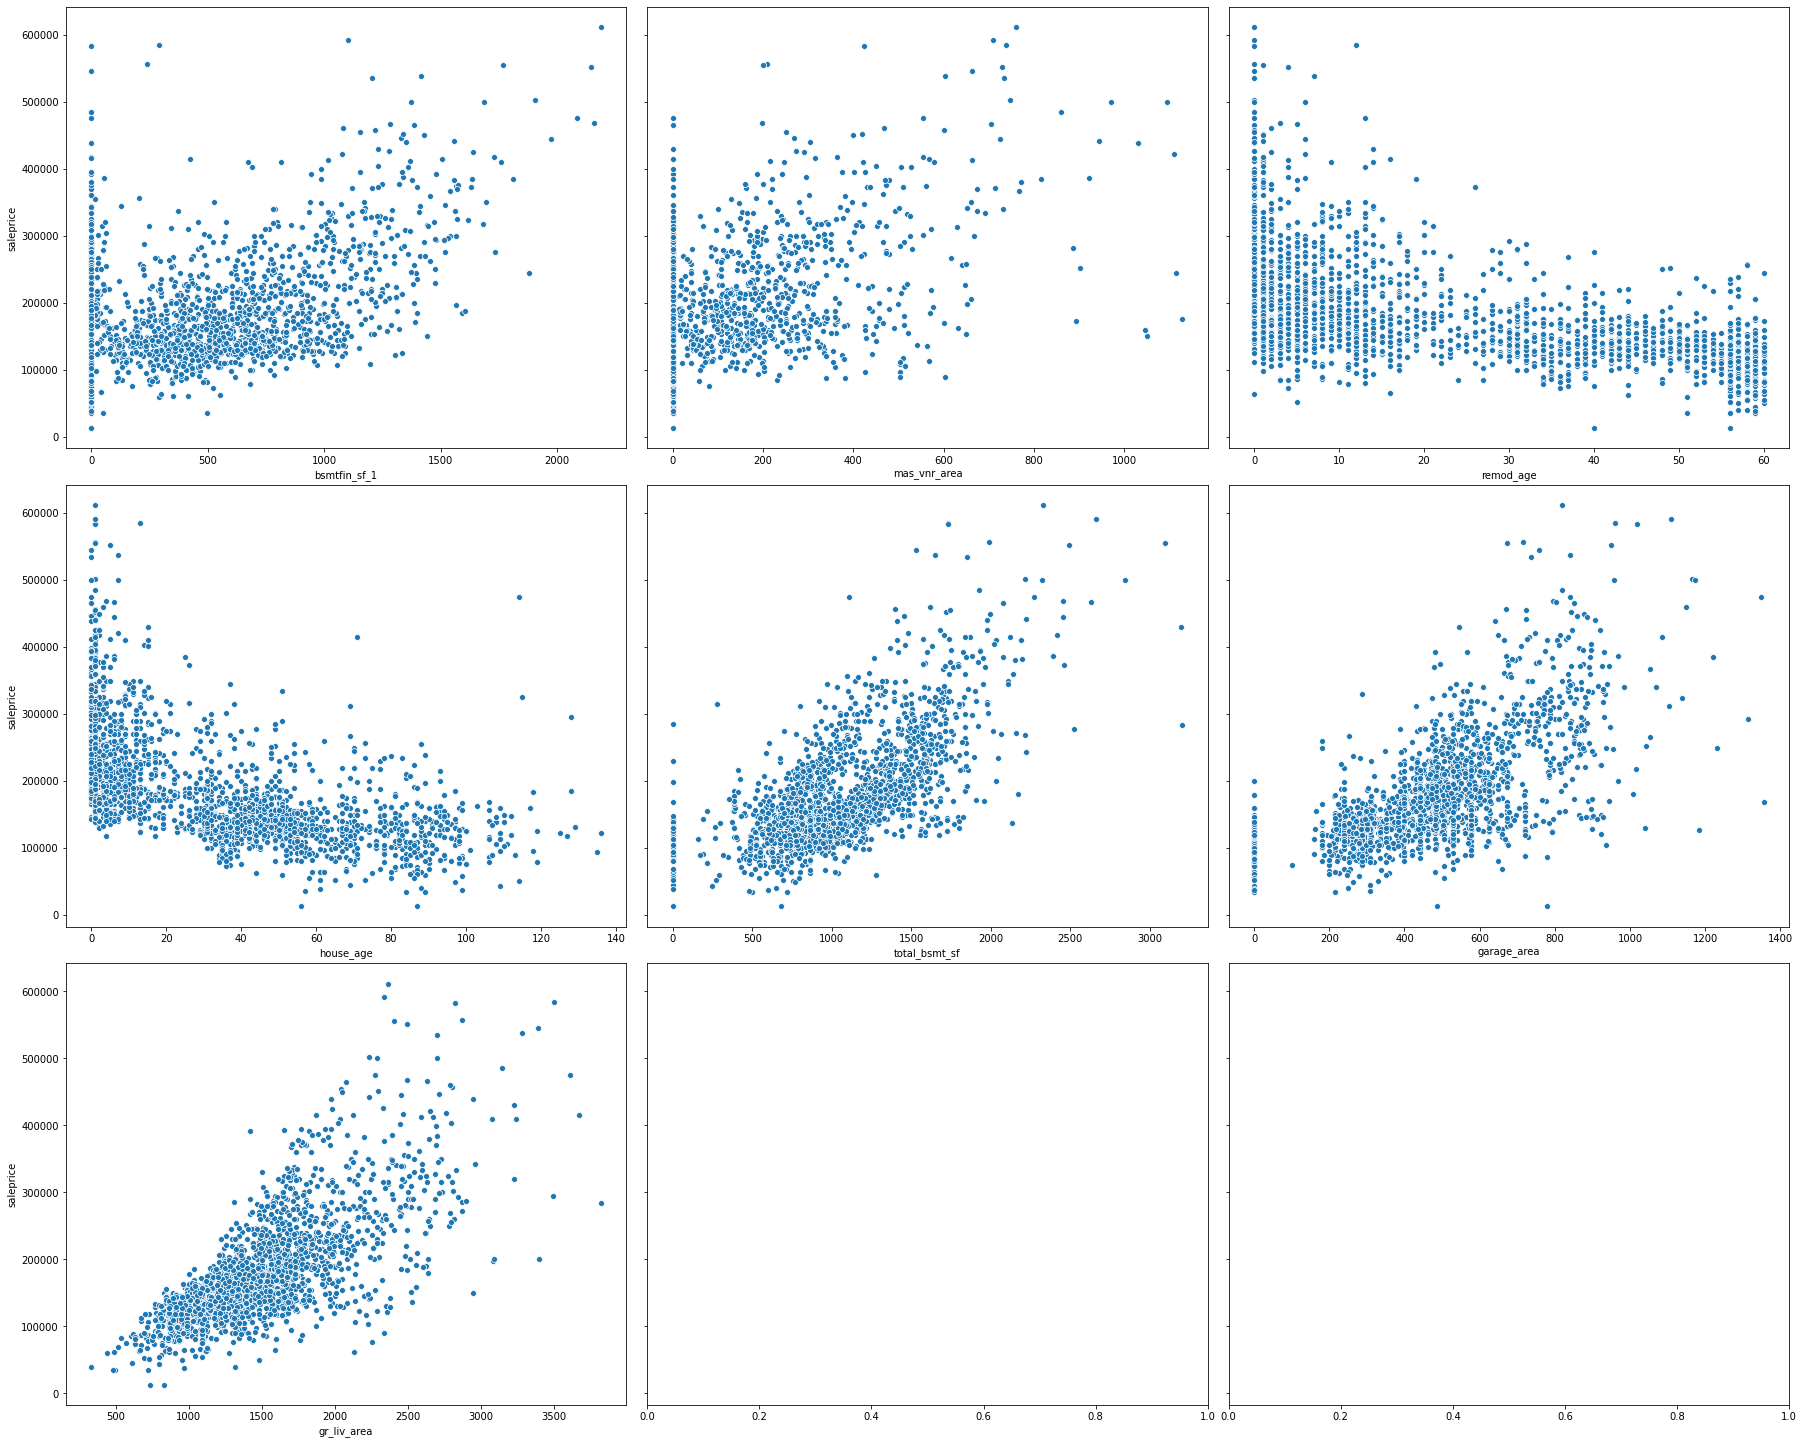

In [104]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 20), sharey=True)
ax = ax.ravel()
for i in range(len(continuous.columns)-1):
    sns.scatterplot(x=continuous.columns[i], y='saleprice', data=train, ax=ax[i])
plt.tight_layout(pad=0.5)

## Feature Engineering

### Missing Data Imputation using Regression

However, we still have some missing data in the garage_age that needs to fill up. It would be unwise to fill up with only the mean value of the dataset, as we would need to do the same thing to the test set later on. It would cause the distribution to be heavily concentrated on the mean, which does not represent the actual distribution well. So instead, we will be doing the imputation using regression, with references to the other columns that have no missing data.

#### Target - Garage Age

In [105]:
# Garage Age Missing Data Count
train.garage_age.isnull().sum()

113

In [106]:
# Create 'training data' with no missing value
temp_df = train.dropna()
temp_df = pd.get_dummies(temp_df, drop_first=True)
X = temp_df.drop(['saleprice', 'garage_age'], axis=1)
y = temp_df.garage_age

#### Preprocessing

In [107]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

# Standard Scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#### Model Evaluation

For the imputation, we will only be using a Lasso Regression as its regularization nature will perform feature selection during the data training. Then with the model, we will use it to predict for the entire dataset's garage age. Then we will replace all missing value with the prediction while keeping the original value intact.

In [108]:
# Instantiation
lasso = LassoCV(alphas=np.logspace(-2,0,10), max_iter=10_000, cv=5, random_state=42)

# Data Training
lasso.fit(X_train_scaled, y_train)

# Metrics Evaluation
cross_val_score(lasso, X_train_scaled, y_train)

array([0.83355423, 0.8133094 , 0.77417283, 0.76926818, 0.78702868])

In [109]:
yhat_train = lasso.predict(X_train_scaled)
mean_absolute_error(y_train, yhat_train)

6.2360296854826975

In [110]:
lasso.score(X_test_scaled, y_test)

0.7738304902311838

In [111]:
yhat = lasso.predict(X_test_scaled)
mean_absolute_error(y_test, yhat)

7.626276878276187

In [112]:
best_alpha = lasso.alpha_
best_alpha

0.21544346900318834

From the train-test evaluation of our model, we can predict the garage age at an accuracy of 77%, or 7.6 years error on average.

#### Prediction

In [113]:
# Preparation of training and testing data
temp_df = pd.get_dummies(train, drop_first=True)

X_test = temp_df.drop(['saleprice', 'garage_age'], axis=1)
y_test = temp_df.garage_age

clean_temp_df = temp_df.dropna()
clean_temp_df = pd.get_dummies(clean_temp_df, drop_first=True)
X_train = clean_temp_df.drop(['saleprice', 'garage_age'], axis=1)
y_train = clean_temp_df.garage_age

In [114]:
# Instantiation
lasso = Lasso(alpha = best_alpha, random_state=42)

# Data Training
lasso.fit(X_train, y_train)
yhat = lasso.predict(X_test)

# Metrics Evaluation
cross_val_score(lasso, X_train, y_train)

array([0.81438827, 0.81876821, 0.79297637, 0.75337222, 0.77080348])

In [115]:
# Remove the float value
yhat = yhat.astype(int)

#### Data Merging

In [116]:
# Replace missing value with the prediction
train.garage_age = train.garage_age.fillna(pd.Series(yhat))

In [117]:
# Sanity check on missing value
train.garage_age.isnull().sum()

0

Now we will repeat the same thing on our holdout data.

In [118]:
temp_df = pd.get_dummies(test, drop_first=True)
X_test = temp_df.drop(['garage_age'], axis=1)
y_test = temp_df.garage_age

In [119]:
temp_df = pd.get_dummies(test, drop_first=True)
X_test = temp_df.drop(['garage_yr_blt','garage_age'], axis=1)
y_test = temp_df.garage_age

temp_df = pd.get_dummies(train, drop_first=True)
clean_temp_df = temp_df.dropna()
clean_temp_df = pd.get_dummies(clean_temp_df, drop_first=True)
X_train = clean_temp_df.drop(['saleprice', 'garage_age'], axis=1)
y_train = clean_temp_df.garage_age

# Fill up any missing dummy column
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
        
for col in X_test.columns:
    if col not in X_train.columns:
        X_test.drop(col, axis=1, inplace=True)

# Instantiation
lasso = Lasso(alpha = best_alpha)

# Data Training
lasso.fit(X_train, y_train)
yhat = lasso.predict(X_test)

# Metrics Evaluation
cross_val_score(lasso, X_train, y_train).mean()

0.6866922734285481

In [120]:
test.garage_age = test.garage_age.fillna(pd.Series(yhat))

In [121]:
test.garage_age.isnull().sum()

0

### Training Data Preprocessing

#### Data Preparation

In [122]:
train.head()

,ms_subclass,ms_zoning,lot_area,street,alley,land_contour,neighborhood,condition_1,condition_2,house_style,overall_qual,overall_cond,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,house_age,remod_age,garage_age
0,60,RL,13517,Pave,NA,Lvl,Sawyer,RRAe,Norm,2Story,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,2,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,NA,0,3,2010,WD,130500,34,5,34.0
1,60,RL,11492,Pave,NA,Lvl,SawyerW,Norm,Norm,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,3,Attchd,2,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,NA,0,4,2009,WD,220000,13,12,12.0
2,20,RL,7922,Pave,NA,Lvl,NAmes,Norm,Norm,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,0,Detchd,1,1.0,246.0,3,3,Y,0,52,0,0,0,0,0,NA,0,1,2010,WD,109000,57,3,57.0
3,60,RL,9802,Pave,NA,Lvl,Timber,Norm,Norm,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,0,BuiltIn,3,2.0,400.0,3,3,Y,100,0,0,0,0,0,0,NA,0,4,2010,WD,174000,4,3,3.0
4,50,RL,14235,Pave,NA,Lvl,SawyerW,Norm,Norm,1.5Fin,6,8,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,0,Detchd,1,2.0,484.0,3,3,N,0,59,0,0,0,0,0,NA,0,3,2010,WD,138500,110,17,53.0


In [123]:
# Declaration of the training data X and y based on the preliminary feature selection index
X = train[list(num_idx) + list(cat_idx)].drop('saleprice', axis=1)
y = train.saleprice

In [124]:
X.shape

(2046, 29)

We can see from the shape of our dataframe that we have downsize our features from the original 80 to 29 at this point. However, the number of columns will increase significantly after one-hot encoding exercise of the categorical columns.

#### One-Hot Encoding

In [125]:
# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

In [126]:
X.shape

(2046, 103)

As expected, the column counts grew from 29 to a tremendous amount of 103 columns. Therefore, we will need another round of feature selection using Recursive Feature Selection (RFE) technique.

## Modelling

### Feature Selection

#### Multiple Linear Regression (Benchmark)

In [127]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True,
                                                    test_size=0.2)

# Instantiation
lr = LinearRegression()

# Data Training
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

# Metrics Evaluation
print("Training Score: ", cross_val_score(lr, X_train, y_train).mean())
print("Training RMSE: ", mean_squared_error(y_train, lr.predict(X_train))**0.5)
print("Testing Score: ", r2_score(y_test, yhat))
print("Testing RMSE: ", mean_squared_error(y_test, yhat)**0.5)

Training Score:  0.8857612727963872
Training RMSE:  24335.452701588027
Testing Score:  0.8893000610129222
Testing RMSE:  26262.038533657334


The above results acquired from the MLR model will serve as a benchmark score to evaluate our model later on. It is a model with no RFE involved yet.

#### RFECV

Before we feed the features into RFE, we need to scale the features for the algorithm to work.

In [128]:
ss = StandardScaler()
X_rfe = ss.fit_transform(X)

In [129]:
X_rfe.shape[1]

103

In [130]:
# RFECV
lr = LinearRegression()
selector = RFECV(lr, cv=10, scoring='r2')
selector.fit(X_rfe, y)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='r2', step=1, verbose=0)

In [131]:
selector.n_features_

36

Now we are only left with 36 features, from the initial 103 features.

In [132]:
best_columns = X.columns[selector.support_]

In [133]:
X = X[best_columns]

In [134]:
selection_corr = pd.Series(index=X.columns, data=selector.estimator_.coef_)

In [135]:
# Selection of only the top 30 features
rfe_index = np.abs(selection_corr).sort_values(ascending=False).head(30).index

In [136]:
# Assignment
X_top = X[rfe_index]

After the selection based on the coefficient of each feature, we have filtered down to only 30 features. So now we are ready to build and test our predictive model.

### Regression Model Selection

#### Data Transformation

For the model selection, the training data will be split based on the ratio of training data to test data to simulate the actual prediction of the holdouts. The regression model with the highest r2 score will be selected for the final model.

In [137]:
# Train-test data ratio
simul_perc = test.shape[0] / train.shape[0]

In [138]:
# Train-test split according to actual train-test ratio
X_train, X_test, y_train, y_test = train_test_split(X_top, y, random_state=42, shuffle=True,
                                                    test_size=simul_perc, stratify=None)

In [139]:
# Scaling
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

We will be testing 4 types of regression technique (MLR, Ridge, Lasso and ElasticNet Regression) and choose the best-performing model for the final prediction of our holdout data.

#### Multiple Linear Regression

In [140]:
# Instantiation
lr = LinearRegression()

# Data Training
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

# Metrics Evaluation
print("Training Score: ", cross_val_score(lr, X_train, y_train).mean())
print("Training RMSE: ", mean_squared_error(y_train, lr.predict(X_train))**0.5)
print("Testing Score: ", r2_score(y_test, yhat))
print("Testing RMSE: ", mean_squared_error(y_test, yhat)**0.5)

Training Score:  0.878696826935137
Training RMSE:  25508.520814302337
Testing Score:  0.8978636938192637
Testing RMSE:  25726.739736868716


#### Ridge Regression

In [141]:
# Instantiation
ridge = RidgeCV(alphas=np.logspace(0,4,200))

# Data Training
ridge.fit(X_train_scaled, y_train)
yhat = ridge.predict(X_test_scaled)

# Metrics Evaluation
print("Best Alpha: ", ridge.alpha_)
print("Training Score: ", cross_val_score(ridge, X_train_scaled, y_train).mean())
print("Training RMSE: ", mean_squared_error(y_train, ridge.predict(X_train_scaled))**0.5)
print("Testing Score: ", r2_score(y_test, yhat))
print("Testing RMSE: ", mean_squared_error(y_test, yhat)**0.5)

Best Alpha:  23.272024789604085
Training Score:  0.8790908649330745
Training RMSE:  25534.690354299844
Testing Score:  0.8976825661473014
Testing RMSE:  25749.54142490827


#### Lasso Regression

In [142]:
# Instantiation
lasso = LassoCV(alphas=np.logspace(-2,0,15), max_iter=50_000, cv=3, random_state=42)

# Data Training
lasso.fit(X_train_scaled, y_train)
yhat = lasso.predict(X_test_scaled)

# Metrics Evaluation
print("Best Alpha: ", lasso.alpha_)
print("Training Score: ", cross_val_score(lasso, X_train_scaled, y_train).mean())
print("Training RMSE: ", mean_squared_error(y_train, lasso.predict(X_train_scaled))**0.5)
print("Testing Score: ", r2_score(y_test, yhat))
print("Testing RMSE: ", mean_squared_error(y_test, yhat)**0.5)

Best Alpha:  0.01
Training Score:  0.8786954272922621
Training RMSE:  25508.52081498748
Testing Score:  0.8978636590310352
Testing RMSE:  25726.74411820801


#### ElasticNet

In [143]:
score = 0

# Loop to pick the best hyper-params on test r2 score
for ratio in np.logspace(-2,0,30):
    # Instantiation
    enet = ElasticNetCV(l1_ratio=ratio, alphas=np.logspace(0,4,200), max_iter=50_000, cv=3, random_state=42)

    # Data Training
    enet.fit(X_train_scaled, y_train)
    yhat = enet.predict(X_test_scaled)
    train_score = cross_val_score(enet, X_train_scaled, y_train).mean()
    test_score = r2_score(y_test, yhat)
    if test_score > score:
        score = test_score
        best_train_score = train_score
        best_test_score = test_score
        best_alpha = enet.alpha_
        best_ratio = ratio
        best_train_rmse = mean_squared_error(y_train, enet.predict(X_train_scaled))**0.5
        best_test_rmse = mean_squared_error(y_test, yhat)**0.5
    
# Metrics Evaluation
print("Best Alpha: ", best_alpha)
print("Best L1_ratio: ", best_ratio)
print("Training Score: ", best_train_score)
print("Training RMSE: ", best_train_rmse)
print("Testing Score: ", best_test_score)
print("Testing RMSE: ", best_test_rmse)

Best Alpha:  1.0
Best L1_ratio:  1.0
Training Score:  0.8782913014476111
Training RMSE:  25508.527664600275
Testing Score:  0.8978601513840822
Testing RMSE:  25727.185878506058


All 4 models seems to be slightly underfit given the training and testing score difference. However, this is might be due to our aggresive strategy of feature selection. But the underfitting situation is not in a very bad state, in fact, there are only very minimal difference.

## Prediction

### Prediction with Best Model

Multiple Linear Regression and Lasso Regression stood out with the best performance among the 4 regression model. The two models have minimal difference in term of testing accuracy. It would mean that the model no longer require regularization, further tuning of coeffcients might cause the model to underfit. Hence, MLR will be picked for the prediction of holdout data (test.csv).

In [144]:
# One-Hot Encoding for Holdouts
X_test_raw = pd.get_dummies(test)

# Create any dummy column if not exist in Holdouts
for col in rfe_index:
    if col not in X_test_raw.columns:
        print('Missing Columns: ', col)
        X_test_raw[col] = 0
print('\nMissing field all successfully patched up')

Missing Columns:  neighborhood_GrnHill

Missing field all successfully patched up


In [145]:
# Data Instantiation
X_train = X_top
y_train = y
X_test = X_test_raw[rfe_index]

In [146]:
# Instantiation
lr = LinearRegression()

# Data Training
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [147]:
# Model Training Data Metrics
print("Training Score: ", cross_val_score(lr, X_train, y_train).mean())
print("Training RMSE: ", mean_squared_error(y_train, lr.predict(X_train))**0.5)
print("Training MAE: ", mean_absolute_error(y_train, lr.predict(X_train)))

Training Score:  0.8921503641115601
Training RMSE:  25407.749946079322
Training MAE:  18160.19866111805


From the training model metrics, we can see that the RMSE is higher than expected (at \\$25,407), given the average house value in Ames is only at \\$181,515. However, RMSE tends to exaggerate the error due to outliers, so for this case, we may also refer to the MAE of our training data, which is only at \\$18,160 (much better than the RMSE).

### Prediction Distribution

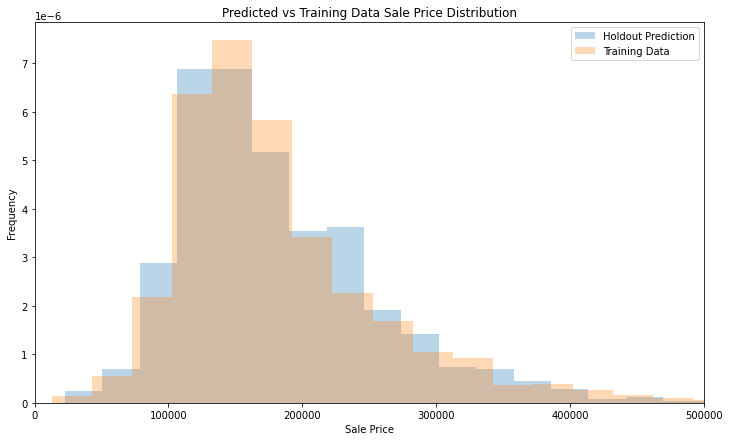

In [148]:
# Predicted Price Distribution
pd.Series(yhat).plot(kind='hist', xlim=(0,500000), alpha=0.3,
                     density=True, bins=20, figsize=(12,7), label='Holdout Prediction')
y.plot(kind='hist', xlim=(0,500000), alpha=0.3, 
       density=True, bins=20, figsize=(12,7), label='Training Data')
plt.title('Predicted vs Training Data Sale Price Distribution')
plt.xlabel('Sale Price')
plt.legend()
plt.show()

From the distribution density plot above, we can see that our prediction on the holdout data has almost the same distribution as the actual sale price of our training data, which seems to be a good sign that indicates a generalized model.

### Submission Data Export

Next up, we will create a dataframe out of our prediction of the holdout data and export it for Kaggle submission to assess the prediction capability of our regression model.

In [149]:
# Save to CSV for Kaggle Submission (without Index)
final = pd.concat([test, pd.Series(yhat, name='SalePrice')], axis=1)
submission = final[['id','SalePrice']].sort_values('id')

In [150]:
# Conforming to competition naming regulation
submission.columns = ['Id','SalePrice']

In [151]:
# Sanity check on submission datafrane
submission.head()

,Id,SalePrice
704,2,120808.527514
706,4,281728.758077
120,6,172416.573988
312,7,256752.971039
401,17,192973.094050


In [159]:
# Export to CSV for submission to Kaggle
submission.to_csv('./submission_records/current_submission.csv', index=False)

The model has managed to achieve a RMSE of \\$29,256 on Kaggle, much higher than the RMSE of our data. As compared to our model performance on the test-split, which is only at \\$25,727, the model is far from perfect; However, the result is expected because of the unseen data in the holdout.

## Inferential Statistics

In [153]:
pd.Series(lr.coef_, X_test.columns).sort_index()

bsmt_exposure            6130.737226
bsmt_qual                2959.372307
bsmtfin_sf_1               24.604943
exter_qual               8306.165301
exterior_1st_BrkFace    16053.736705
fireplace_qu             2003.278802
foundation_Slab         20742.001504
garage_area                38.631620
garage_type_Attchd      11752.674469
garage_type_BuiltIn     19235.157022
garage_type_Detchd       8170.699794
garage_type_NA          14179.853525
gr_liv_area                52.344327
heating_qc               2990.393683
house_style_1Story       7012.740957
kitchen_qual             8676.756237
mas_vnr_area               49.180408
mas_vnr_type_BrkFace     6007.767310
mas_vnr_type_None       16928.132517
mas_vnr_type_Stone      12888.661090
neighborhood_Crawfor    17995.318620
neighborhood_GrnHill    98723.697730
neighborhood_NoRidge    25623.816108
neighborhood_NridgHt    25443.751166
neighborhood_Somerst     4464.995841
neighborhood_StoneBr    42516.595263
overall_qual             9194.251843
r

In [154]:
lr.intercept_

-127382.65981627244

As seen above is the coefficient of the selected 30 features that defines our regression model. The following points may sum the inference that we may draw from the modelling attempt: 
1. Of all the 30 features, all of them have positive coefficient except for remod_age. This is perfectly understandable, as a house age, the price of it tends to drop. As the house age by 1 year, the selling price will drop by \\$155.


2. Interestingly, the year of house since last remodelling seems to play a bigger part on the sale price than the year that a house is actually built. Hence, a remodelling attempt may actually help to raise your selling price.


3. Neighborhood of where a house is situated is very critical to the housing price. Greenhill is the most premium among all, averagely priced \\$98,723 above most of the neighborhood in Ames. The other upscale neighborhoods that have huge effect on the pricing are Stone Brook (\\$42,516), Northridge (\\$25,623), Northridge Heights (\\$25,443), Crawford (\\$17,995) and Somerset ($4,464).


4. A new house costs \\$20,388 more than a pre-owned house.


5. The overall material and finishing quality of a house play a very part in the housing price, as the scale - of 1 to 10 - climb up by 1 score, the price will increase by \\$9,194. The quality of the house components are important too, such as kitchen, exterior, basement, heating system and fireplace.


6. Presence of basement and fireplace may increase the value of a property. Having a basement with exposure to the lawn will give a boost to the price as well.


7. Surprisingly, a single-storey property cost \\$7,012 more than the other configuration.


8. As the house area expand by 1 square-feet, the housing price will grow by \\$52. The same rule apply to the masonry veneer, garage and basement, but at different rate.


9. Houses with concrete slab foundation cost \\$20,742 than the rest, such as wood, brick etc.

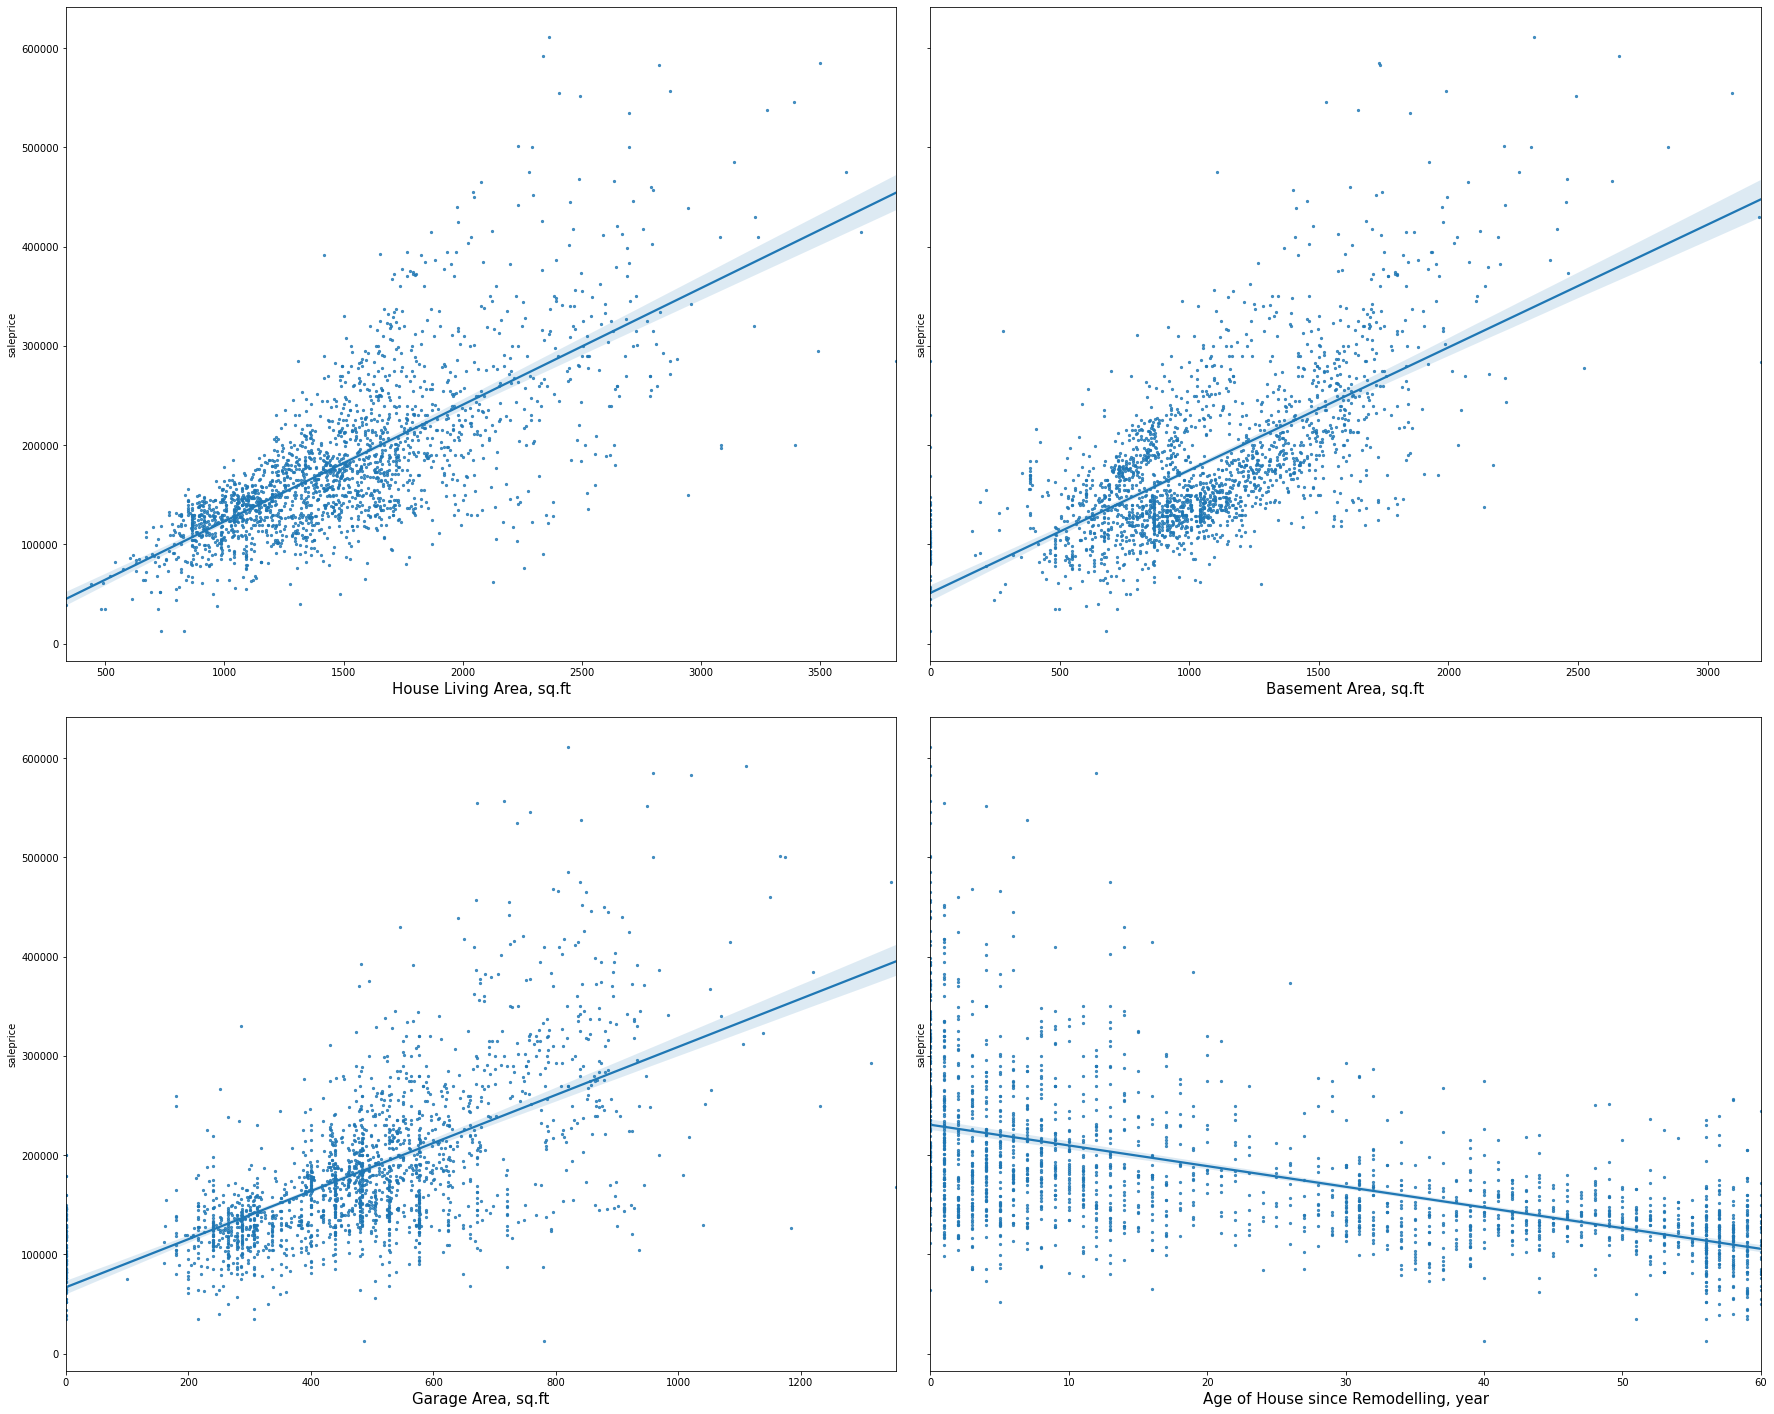

In [155]:
col_to_plot = ['gr_liv_area','total_bsmt_sf','garage_area','remod_age']
xlabels = ['House Living Area, sq.ft', 'Basement Area, sq.ft', 
           'Garage Area, sq.ft', 'Age of House since Remodelling, year']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 20), sharey=True)
ax = ax.ravel()
for i in range(len(col_to_plot)):
    sns.regplot(x=col_to_plot[i], y='saleprice', data=train, ax=ax[i], scatter_kws={'s':5})
    ax[i].set_xlabel(xlabels[i], fontsize=15)
plt.tight_layout(pad=2)

Most of these variable are exhibiting heteroscedasticity nature, which is why additional features are required to explain the data trend.

## Conclusion

In [156]:
print("Average House Value in Ames: $" + str(int(train.saleprice.mean())))

Average House Value in Ames: $181515


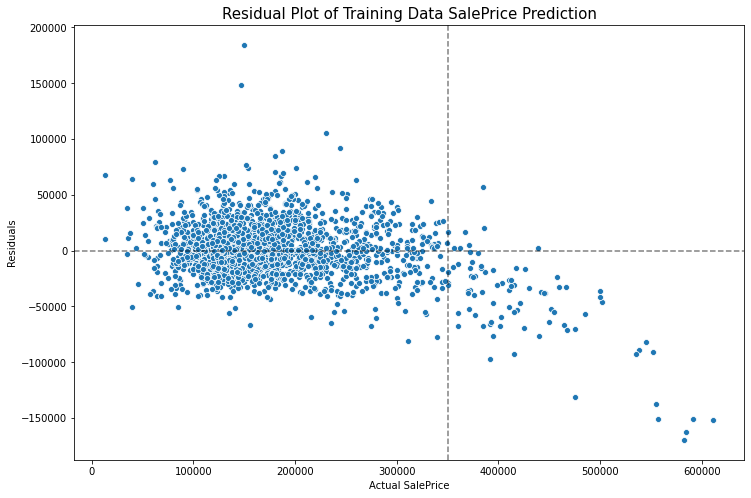

In [157]:
residuals = lr.predict(X_train) - y_train
plt.figure(figsize=(12,8))
sns.scatterplot(y_train, residuals)
plt.title('Residual Plot of Training Data SalePrice Prediction', fontsize=15)
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals')
plt.axhline(0, ls='--', color='k', alpha=0.5)
plt.axvline(350_000, ls='--', color='k', alpha=0.5)
plt.savefig('./img/residual_plot')

From the residual plot of training data above, we can see that the predictive model is fairly accurate for houses that ought to priced at \\$350,000 and below - with error of up to ±50,000 for most cases. It performs poorly for houses above \\$350,000, constantly undervalue the property price. This error might be caused by the limited number of training data with houses priced above this value. The model will be much improved if we could expand our training data with more property transaction record from Ames, especially with houses sold above \\$350,000. 

Generally, our regression model is able to predict at a fairly good accuracy on both the training data and holdouts, with RMSE at \\$25,407 and \\$29,256 (from Kaggle). The RMSEs are higher than expected, given the average house value in Ames is only at \\$181,515. However, RMSE tends to exaggerate the error due to outliers, so for this case, we may also refer to the MAE of our training data, which is only at \\$18,160 (much better than the RMSE). 